## Final Project Submission

Please fill out:
* Student name: Sam Oliver
* Student pace: self paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://samoliverds.blogspot.com/2021/12/the-utility-of-using-r-squared-as.html


## Business Problem

The stakeholder is a real estate agency that wants to establish its group in the King's County area. Their aim is to find which characteristics create value in homes. The agency will then invest in homes with these characteristics.

## Import Data and Clean the Data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# imports for statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import meanabs

plt.style.use('seaborn')

In [2]:
# import the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# look at columns to see what can be dropped immediately
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Columns to drop:
* id: non-descriptive - I will hold onto this to use for later and make sale id. An id that tracks each individual sale and not just the house. Some houses have been sold twice or even three times in the time frame of this dataset.
* date: all of the homes were sold from 2014-2015, and I will assume that this information is not important, but I will keep a dataframe with the date in case I want it for later. (will drop this column later)

In [4]:
# check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Columns containing null objects: yr_renovated, waterfront, view
* I will assume that null values in yr_renovated have not been renovated and will set missing values to 0
* I will assume that null values in waterfront are not waterfront properties and will set these missing values to 0.
* I will assume that null values in view are properties that do not have views and will set these null objects to 0

In [5]:
# set NA values in yr_renovated, waterfront, and view to 0
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# drop exact duplicates (same exact values across rows)
df = df.drop_duplicates()

In [7]:
# create simple id number for each row. this number represents the sale id - 
# the number tied to the individual sale of a home.
sale_id = []
for i in df.index:
    sale_id.append(i+100)   # simply add 100 to each index value to create col
    
df['sales_id'] = sale_id
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_id
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,100
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,101
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,102
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,103
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,21692
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,21693
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,21694
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,21695


In [8]:
# handle values of waterfront, grade, etc... object columns
obj_cols = ['waterfront', 'view', 'condition', 'grade', 'sqft_basement']
for c in obj_cols:
    print(df[c].unique())

[0 'NO' 'YES']
['NONE' 0 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0'
 '1080.0' '960.0' '280.0' '870.0' '1100.0' '460.0' '1400.0' '660

In [9]:
# handle values in object columns

# waterfront
df.loc[df['waterfront'] == 'NO', 'waterfront'] = 0
df.loc[df['waterfront'] == 'YES', 'waterfront'] = 1

# view
df.loc[df['view'] == 'NONE', 'view'] = 0
df.loc[df['view'] == 'FAIR', 'view'] = 1     # fair will be 1
df.loc[df['view'] == 'AVERAGE', 'view'] = 2      # average will be 2
df.loc[df['view'] == 'GOOD', 'view'] = 3    # good is 3
df.loc[df['view'] == 'EXCELLENT', 'view'] = 4     # excellent is 4

# condition
df.loc[df['condition'] == 'Poor', 'condition'] = 0
df.loc[df['condition'] == 'Fair', 'condition'] = 1     # fair will be 1
df.loc[df['condition'] == 'Average', 'condition'] = 2      # average will be 2
df.loc[df['condition'] == 'Good', 'condition'] = 3    # good is 3
df.loc[df['condition'] == 'Very Good', 'condition'] = 4     # very good is 4

# grade
df.loc[df['grade'] == '3 Poor', 'grade'] = 0
df.loc[df['grade'] == '4 Low', 'grade'] = 1     
df.loc[df['grade'] == '5 Fair', 'grade'] = 2      
df.loc[df['grade'] == '6 Low Average', 'grade'] = 3    
df.loc[df['grade'] == '7 Average', 'grade'] = 4     
df.loc[df['grade'] == '8 Good', 'grade'] = 5
df.loc[df['grade'] == '9 Better', 'grade'] = 6    
df.loc[df['grade'] == '10 Very Good', 'grade'] = 7      
df.loc[df['grade'] == '11 Excellent', 'grade'] = 8    
df.loc[df['grade'] == '12 Luxury', 'grade'] = 9     
df.loc[df['grade'] == '13 Mansion', 'grade'] = 10     

# sqft_basement - convert from string to float
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0'     # handle ? as 0

# convert altered values to integer
for c in obj_cols:
    # prevent issues of casting int to the string '0.0'
    if c == 'sqft_basement':
        df = df.astype({c: float})
        df = df.astype({c: int})
    else:
        df = df.astype({c: int})

# check
for c in obj_cols:
    print(df[c].unique())

[0 1]
[0 3 4 2 1]
[2 4 3 0 1]
[ 4  3  5  8  6  2  7  9  1  0 10]
[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2

In [10]:
# make df with date before removing it.
df_with_date = df.copy()
df = df.drop(['date'], axis=1)

In [11]:
# check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int32  
 8   view           21597 non-null  int32  
 9   condition      21597 non-null  int32  
 10  grade          21597 non-null  int32  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int32  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Initial Exploration of Data

### Histogram of each variable

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cent

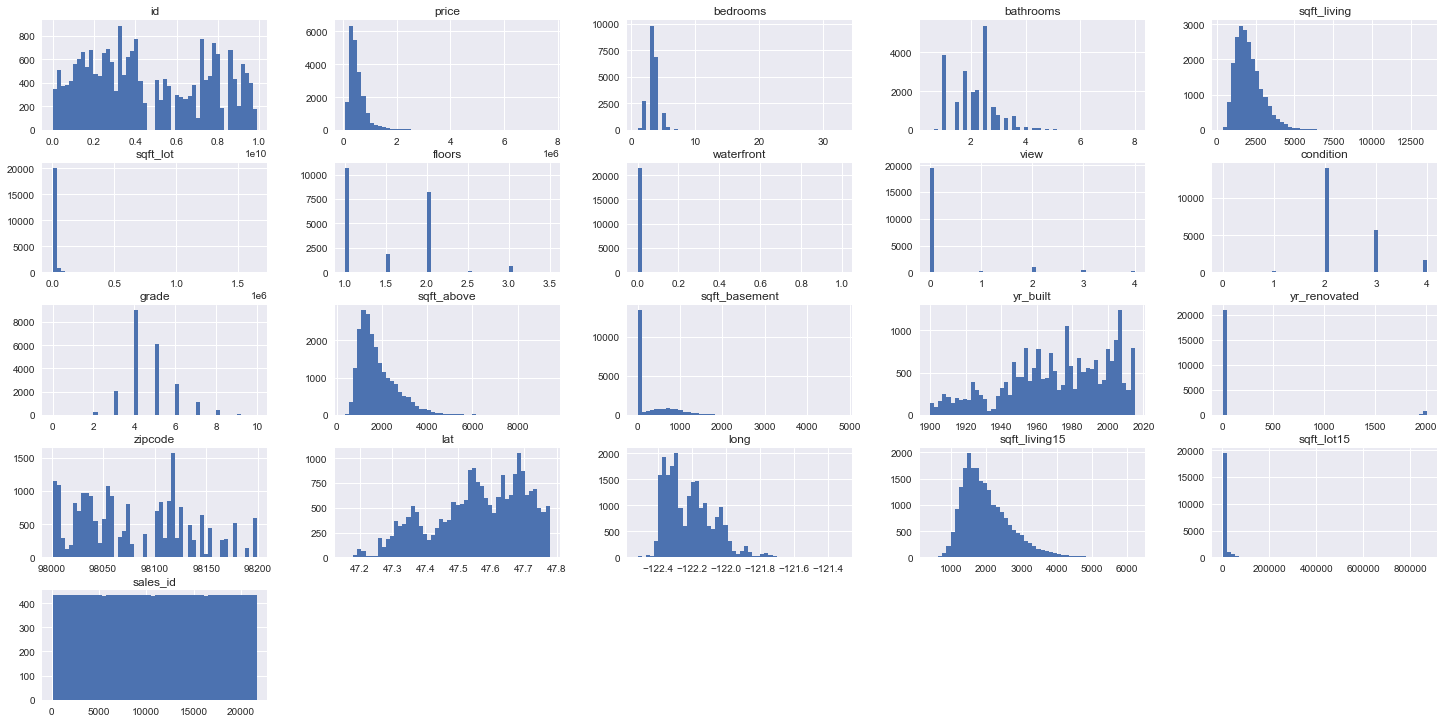

In [12]:
# plot histograms of all the columns in the set.
df.hist(bins=50, figsize=(25, 12.5))

Observations: 
* price, sqft_living, sqft_above, and sqft_living look approximately log-normally distributed.
* Most homes have 1-5 bedrooms
* long and lat look approximately to follow a trimodal distribution
* most homes do not have a view nor are waterfront properties
* most homes have a condition of 2 and many have a condition of 3
* grade is roughly normally distributed.
* most homes do not have a basement

In [13]:
df.sqft_lot.value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

Looks like sqft_lot has both specific and estimated amounts.

### Scatterplot of each variable and price

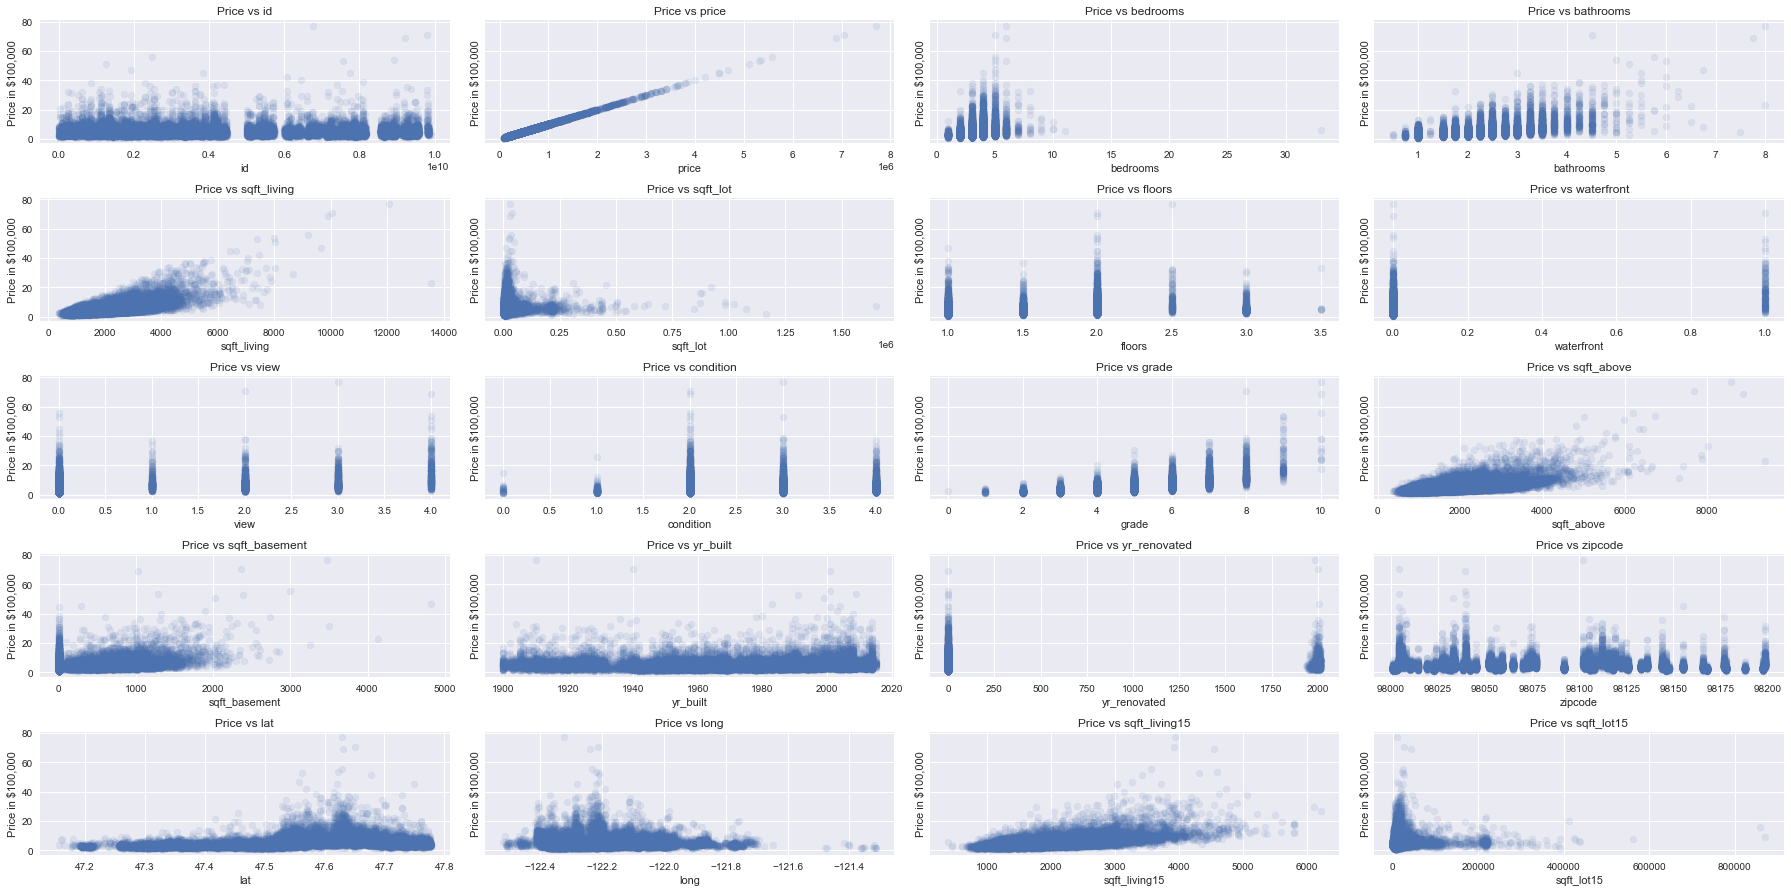

In [14]:
# visualize scatterplots of histograms with price as y variable
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Observations:
* sqft_living and price are fairly linearly related.
* grade and price are somewhat linearly related
* sqft_above and sqft_living15 are somewhat linearly related to price.

### Correlation heatmap

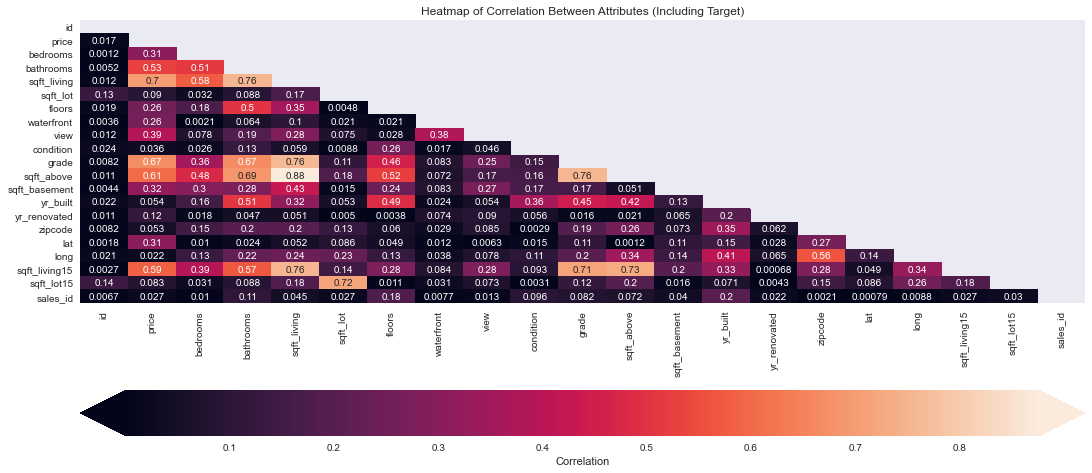

In [15]:
# adapted from dsc-linear-regression-lab
# author: hoffm386
# link: https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution
heatmap_data = df
corr = np.abs(heatmap_data.corr())

# Set up figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2,
              "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Observations:
* sqft_living, grade, and sqft_above are all correlated above 0.6 with price
* predictor variable correlation pairs above 0.6: (grade, sqft_living15), (sqft_above, sqft_living15), (grade, sqft_above), (sqft_lot, sqft_lot15), (sqft_living, sqft_living15), (sqft_living, sqft_above), (sqft_living, grade), (bathrooms, sqft_above), (bathrooms, grade), (bathrooms, sqft_living)

### Investigate linear relationships of variables with target (price)

In [16]:
# create df with numerics to check lr assumptions
df_lin_check = df.drop(['waterfront', 'view', 'yr_built', 'yr_renovated', 
                     'zipcode', 'lat', 'long', 'id', 'sales_id'], axis=1)
df_lin_check.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [17]:
lins = df_lin_check.columns.to_list()
lins

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

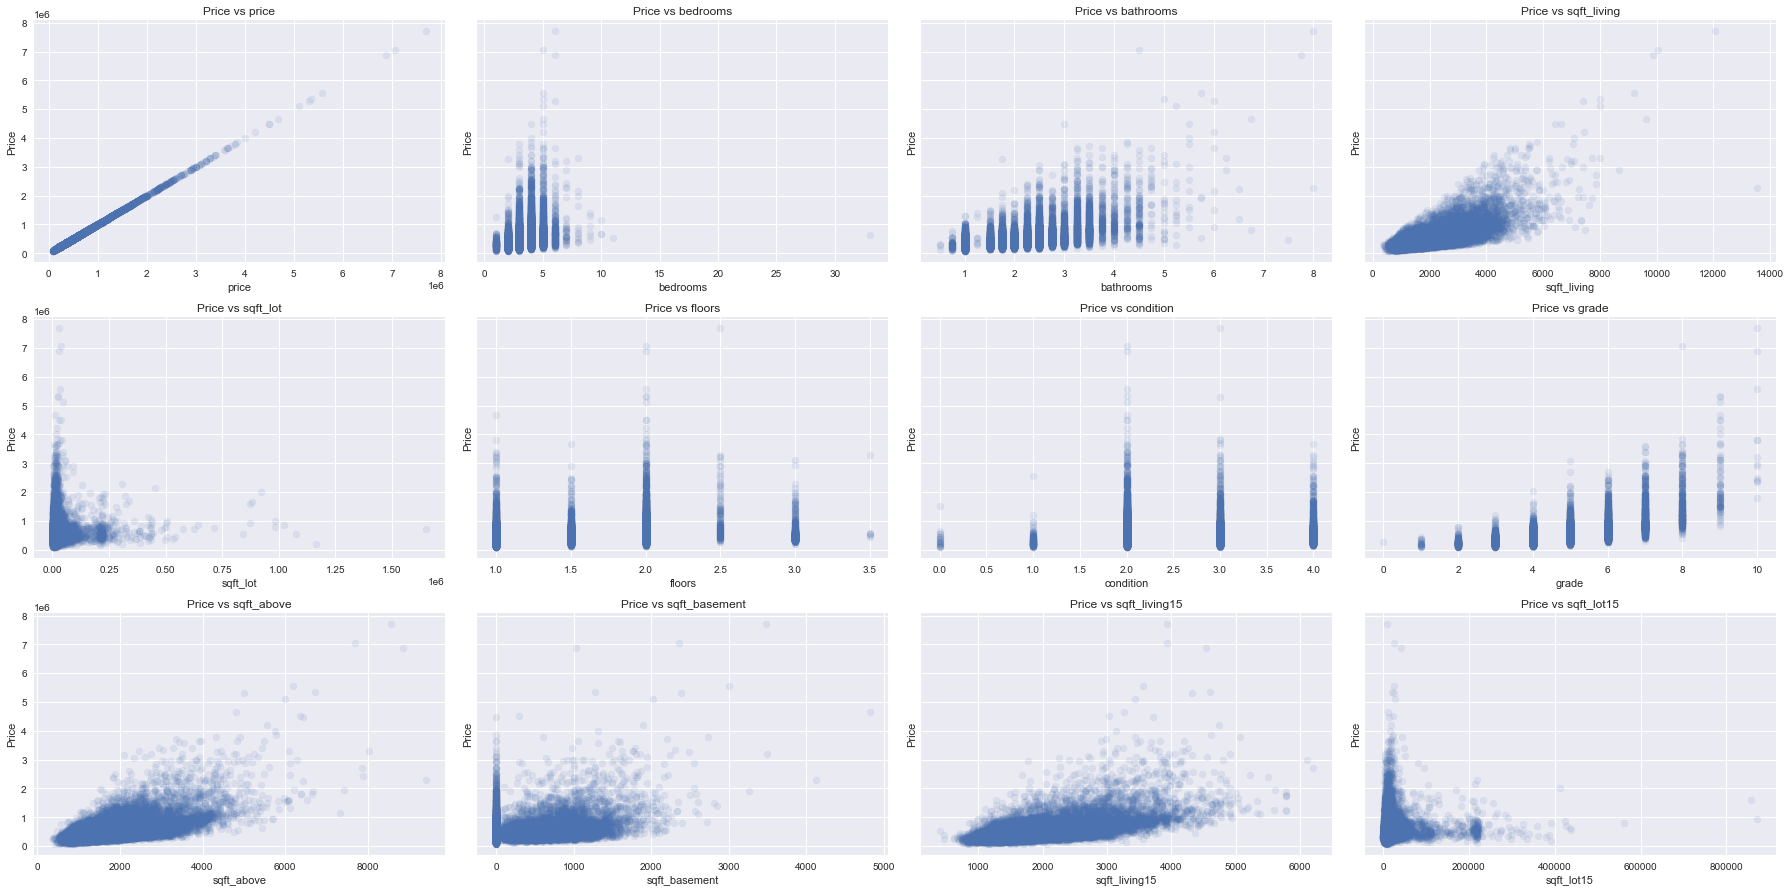

In [18]:
# check linear assumptions
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), lins):
    ax.scatter(df_lin_check[column], df_lin_check['price'], label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

fig.tight_layout()

## Modeling

### Helper functions for modeling

In [19]:
# establish LinearRegression() variable for later use
lr = LinearRegression()

# import for finding r-squared value
from sklearn.metrics import r2_score

In [20]:
# this function places the data in train_test_split and builds a linear
# regression model. 
# Inputs: parameters for modeling & target variable
# Returns: r-squared value
def lin_model(X,y):
    # split into train and test. Use default split size of 0.25 and use same
    # random_state for consistency
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
    
    # fit the model
    lr.fit(X_train, y_train)
    
    # return r-squared
    return lr.score(X_train, y_train)

In [21]:
# this function facillitates log transformation of variables
# inputs: list of variables to be log-transformed and the dataframe that hosts
# these variables
# returns: the modified dataframe
def var_log_transform(var_list, df):
    for var in var_list:
        log_var = np.round_(np.log(df[var]), decimals=6)     # log the variable
        df = df.drop([var], axis=1)     # drop the variable from the df
        df[var] = log_var     # add the logged variable into the df
    return df     # return the df

In [22]:
# this function creates dummy variables for a list of variables and
# concatonates these variables onto the df
# inputs: list of variables to be dummied, df
# returns: df with modified vars
def dum_transformation(dum_list, df):
    for d in dum_list:
        dum = pd.get_dummies(df[d], prefix=d, drop_first=True)     # create dummies
        df = df.drop([d], axis=1)    # drop old variable
        df = pd.concat([df, dum], axis=1)    # add dummies into df
    return df     # return the df

In [23]:
# this function allows efficient statsmodels linear regression modeling
# inputs: df
# returns list: fitted model - can do print(str({name of model}.summary())), 
# X, df_x, df_train_y
def sm_lin_model(df):
    df_y = df[['price']]     # assumes target is 'price' establish y-var df
    df_x = df.drop(['price'], axis=1)  # same assumption and creates x-var df
    
    df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)
    
    X = sm.add_constant(df_train_x)

    # Fit the linear regression model
    model = sm.OLS(df_train_y, X)     # instantiate model
    res = model.fit()     # fit model
    
    # Creating a list of items to return for later use.
    # to_ret = [res, X, df_train_y, df_x]
    
    return res, X, df_y, df_x, df_train_x, df_train_y  # returns the fitted model - can then print summary as str

In [24]:
# this function plots the residuals of the model to check if they follow a
# normal distribution. This function uses a Q-Q-Plot, which should follow a
# linear trend if the assumption is correct.
# inputs: fitted model
def sm_check_resid_normality(res):
    df_residuals = res.resid
    mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                                 fit=True)

In [25]:
# this function plots the homoscedasticity of a linear regression model
# inputs: res (fitted model), df_train_y, X (of form: sm.add_constant(df_train_x))
def sm_check_scedas(res, df_train_y, X):    
    # check for homoscedasticity
    plt.scatter(res.predict(X), res.resid, alpha=.5)     
    plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

    plt.title('Linear Regression Model Homoscedasticity');

In [26]:
# this function checks multicollinearity btwn independent variables
# inputs: dataframe with the independent variables (df_x)
# returns: list of variables with VIF values - be cautious of vals > 5
def multicollinearity_check(df_x):
    X = df_x
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return list(zip(list(df_x.columns), vif))

In [27]:
# this function filters values from a categorical variable based on the IQR
# for each value in the category.
# inputs: the category (type is string) & the dataframe
# returns: the dataframe with modifications
def IQR_filter_categorical(cat, df):
    # create variable with all the unique values from the category.
    cat_uniques = df[cat].unique()
    
    for value in cat_uniques:
        # create new df with each value from the category
        df_cat = pd.DataFrame()
        df_cat = df[df[cat] == value]
        
        # find first and third quartiles
        q3, q1 = np.percentile(df_cat.price, [75 ,25])
    
        iqr = q3 - q1

        # define and drop outliers
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        for row in df.index:
            if df.loc[row, cat] == value:
                if (df.loc[row, 'price'] > upper_bound) |  (df.loc[row, 'price'] < lower_bound):
                    df = df.drop(labels=row, axis=0)
    
    return df

In [28]:
# this function filters values from a numerical variable based on the IQR
# for each value in the category.
# inputs: the category (type is df column (ex: df.price)) & the dataframe
def IQR_filter_numerical(cat, df): 
    # comparison to others. Going to try dropping these values based off of IQR
    q3, q1 = np.percentile(cat, [75 ,25])
    iqr = q3 - q1

    # define and drop outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
            
    df = df[(cat < upper_bound) & (cat > lower_bound)]

    return df

### Model 1

I will use sqft_living and grade for the first model. Grade may be tricky because it is categorical. It may need to be treated with dummy variables, label encoding, or some other method in future models.

I will use statsmodels to create a linear regression model, and I will also use it to check linear regression assumptions (linearity, normality, homoscedasticity, and p-value < 0.05.

#### Create dataframe

In [29]:
# create df with just price, grade, and sqft_living
df_model1 = df[['price', 'sqft_living', 'grade']].copy()

#### Check linearity assumption

* Check if there is a linear relationship between each predictor and target variable.
* Check for outliers 

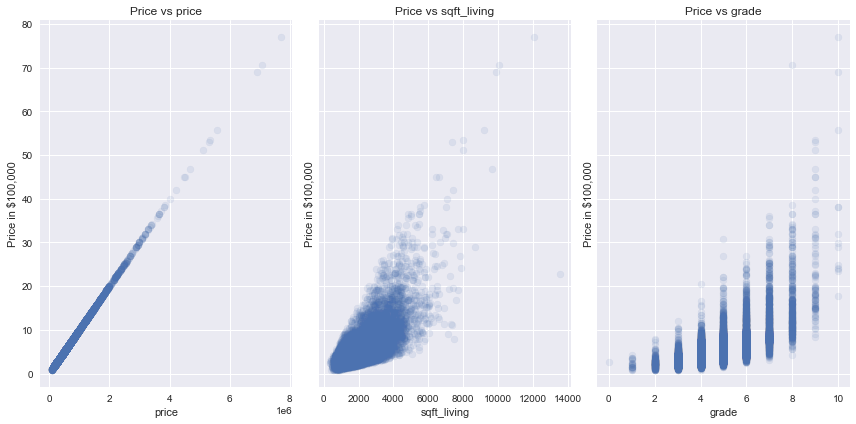

In [30]:
# check assumptions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), sharey=True)

for ax, column in zip(axes.flatten(), df_model1.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Neither variables follow the normality assumption, but I will still model and fix these assumptions later.

#### Fit the model

In [31]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_model1)

In [32]:
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     9352.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:30:59   Log-Likelihood:            -2.2427e+05
No. Observations:               16197   AIC:                         4.485e+05
Df Residuals:                   16194   BIC:                         4.486e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.129e+05   8383.424    -37.318      

#### Check assumptions

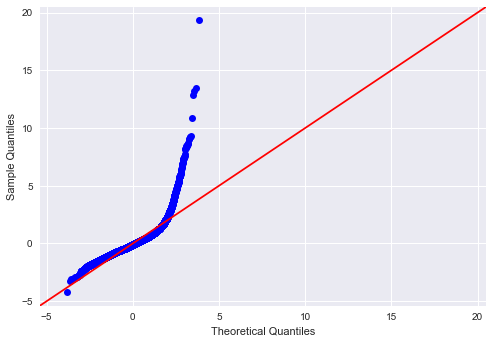

In [33]:
# Normality of residuals
sm_check_resid_normality(res)

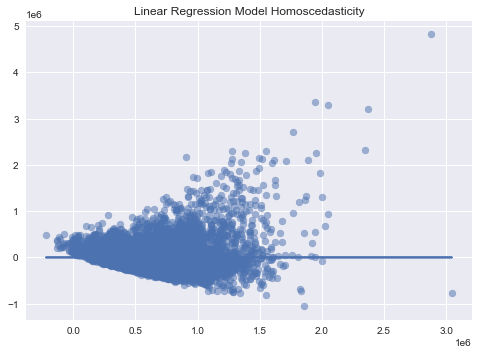

In [34]:
sm_check_scedas(res, df_train_y, X)

None of the assumptions were met, and the model produced a low r^2 value.

#### Evaluate model error with MAE

Even though assumptions were not met, I am still going to evaluate MAE so that I have this code for later.

In [35]:
# generate predictions
ypred = res.predict(X)

# calc MAE
mae = meanabs
mae = mae(df_train_y['price'], ypred)
mae

165041.76217912533

### Model 2

This model will utilize sqft_living and grade again, but it will handle grade with a method used for transforming categorical variables.

#### Create dummy variables for grade

In [36]:
df1 = df[['grade','price','sqft_living']].copy()
dum_list = ['grade']
df1 = dum_transformation(dum_list, df1)     # use custom dummy function
df1

,price,sqft_living,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10
0,221900.0,1180,0,0,0,1,0,0,0,0,0,0
1,538000.0,2570,0,0,0,1,0,0,0,0,0,0
2,180000.0,770,0,0,1,0,0,0,0,0,0,0
3,604000.0,1960,0,0,0,1,0,0,0,0,0,0
4,510000.0,1680,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,0,0,0,0,1,0,0,0,0,0
21593,400000.0,2310,0,0,0,0,1,0,0,0,0,0
21594,402101.0,1020,0,0,0,1,0,0,0,0,0,0
21595,400000.0,1600,0,0,0,0,1,0,0,0,0,0


#### Check linearity assumption

* this was checked in model 1

#### Create and evaluate the model

In [37]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df1)

In [38]:
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2076.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:30:59   Log-Likelihood:            -2.2336e+05
No. Observations:               16197   AIC:                         4.467e+05
Df Residuals:                   16185   BIC:                         4.468e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.823e+05   2.36e+05      0.772      

That's an improvement from the first model, but it's still not great. It's time to incorporate some other variables and possibly try to normalize some of the variables that look log-normal.

#### Check assumptions

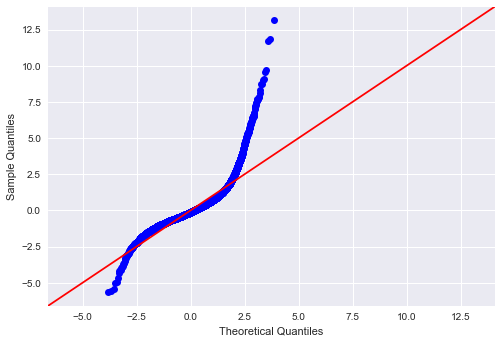

In [39]:
sm_check_resid_normality(res)

Model does not satisfy assumptions

### exploring relationship between sqft_living, sqft_above, sqft_basement

In [40]:
df_e = df[['sqft_living', 'sqft_above', 'sqft_basement']]
df_e

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0
1,2570,2170,400
2,770,770,0
3,1960,1050,910
4,1680,1680,0
...,...,...,...
21592,1530,1530,0
21593,2310,2310,0
21594,1020,1020,0
21595,1600,1600,0


Looks like sqft_living is the sum of sqft_above and sqft_basement

### Model 3 

In [41]:
df_13 = df.copy()
df_13.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sales_id'],
      dtype='object')

In [42]:
df_13.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [43]:
df_13['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

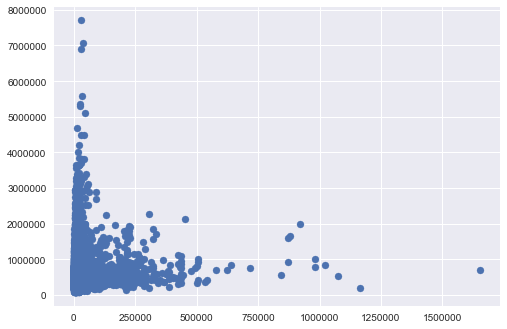

In [44]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(x=df_13['sqft_lot'], y=df_13.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x21ae8f86bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x21ae8f863d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ae8f86490>],
 'medians': [<matplotlib.lines.Line2D at 0x21ae8db9fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ae8db9c40>],
 'means': []}

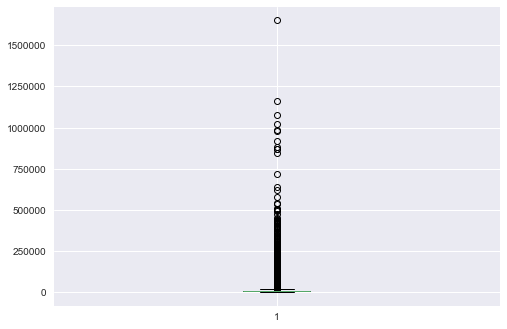

In [45]:
plt.ticklabel_format(useOffset=False, style='plain')     # suppress sci-fi not
plt.boxplot(x=df_13['sqft_lot'])

In [46]:
# I'm assuming that sqft_lot counts total sqft on property including a home,
# apartment, or any other structure. If there are any negative values, then 
# it's probably safe to assume that sqft_lot is the area of the property 
# besides the home.
df_13['lot-living sqft'] = df_13.apply(lambda x: x.sqft_lot - x.sqft_living, axis=1)
df_13

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_id,lot-living sqft
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,2,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,100,4470.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,2,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,101,4672.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,2,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,102,9230.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,4,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,103,3040.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,2,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,104,6400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,2,...,0,2009,0.0,98103,47.6993,-122.346,1530,1509,21692,-399.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,2,...,0,2014,0.0,98146,47.5107,-122.362,1830,7200,21693,3503.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,2,...,0,2009,0.0,98144,47.5944,-122.299,1020,2007,21694,330.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,2,...,0,2004,0.0,98027,47.5345,-122.069,1410,1287,21695,788.0


In [47]:
df_13['lot-living sqft'].describe()

count    2.159700e+04
mean     1.301909e+04
std      4.126330e+04
min     -1.900000e+03
25%      3.095000e+03
50%      5.710000e+03
75%      8.662000e+03
max      1.650059e+06
Name: lot-living sqft, dtype: float64

#### Feature Engineering

In [48]:
# Looks like sqft_lot counts area of property besides structures (sqft_living)
# So sqft_lot + sqft_living is probably total sqft
df_13['total_sqft'] = df_13.apply(lambda x: x.sqft_lot + x.sqft_living, axis=1)
df_13 = df_13.drop(['lot-living sqft'], axis=1)
df_13

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_id,total_sqft
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,2,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,100,6830.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,2,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,101,9812.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,2,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,102,10770.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,4,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,103,6960.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,2,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,104,9760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,2,...,0,2009,0.0,98103,47.6993,-122.346,1530,1509,21692,2661.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,2,...,0,2014,0.0,98146,47.5107,-122.362,1830,7200,21693,8123.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,2,...,0,2009,0.0,98144,47.5944,-122.299,1020,2007,21694,2370.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,2,...,0,2004,0.0,98027,47.5345,-122.069,1410,1287,21695,3988.0


In [49]:
df_13.total_sqft.describe()

count    2.159700e+04
mean     1.717973e+04
std      4.158172e+04
min      1.423000e+03
25%      7.036000e+03
50%      9.575000e+03
75%      1.299500e+04
max      1.652659e+06
Name: total_sqft, dtype: float64

In [50]:
# Looking at yr_built & yr_renovated: seems like newer homes would probably
# sell for more - newer parts means less likely to have major issues - more
# attractive to buyer, etc. 
df_13.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [51]:
df_13.yr_renovated.describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

After looking through some of the data here: https://blue.kingcounty.com/Assessor/eRealProperty/ it seems like renovations are typically pretty major (i.e. adding a whole floor to the property). I am going to group homes into cats from old-new specifically 1-6 with cats: very old, old, somewhat old, somewhat new, new, and very new.
I am going to create an intermediary column as well that will be year built or renovated. I will then use this year to categorize homes into old - new categories such that each 20 years signifies a new category. For example, 'very old' (this will be 0 in the column) signifies homes built or renovated from 1895 - 1915.

In [52]:
# Create new year (old-new) column with values 0-6

# first, create an intermediary column that takes value of yr_renovated or 
# year_built. Will take yr_renovated if there is a value else yr_built
df_13['year_built_or_renovated'] = df_13.apply(lambda x: x.yr_renovated if (x.yr_renovated != 0.00) else x.yr_built, axis=1)

df_13

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_id,total_sqft,year_built_or_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,2,...,1955,0.0,98178,47.5112,-122.257,1340,5650,100,6830.0,1955.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,2,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,101,9812.0,1991.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,2,...,1933,0.0,98028,47.7379,-122.233,2720,8062,102,10770.0,1933.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,4,...,1965,0.0,98136,47.5208,-122.393,1360,5000,103,6960.0,1965.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,2,...,1987,0.0,98074,47.6168,-122.045,1800,7503,104,9760.0,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,2,...,2009,0.0,98103,47.6993,-122.346,1530,1509,21692,2661.0,2009.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,2,...,2014,0.0,98146,47.5107,-122.362,1830,7200,21693,8123.0,2014.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,2,...,2009,0.0,98144,47.5944,-122.299,1020,2007,21694,2370.0,2009.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,2,...,2004,0.0,98027,47.5345,-122.069,1410,1287,21695,3988.0,2004.0


In [53]:
df_13.year_built_or_renovated.describe()

count    21597.000000
mean      1972.945131
std         28.945393
min       1900.000000
25%       1954.000000
50%       1977.000000
75%       1999.000000
max       2015.000000
Name: year_built_or_renovated, dtype: float64

<AxesSubplot:>

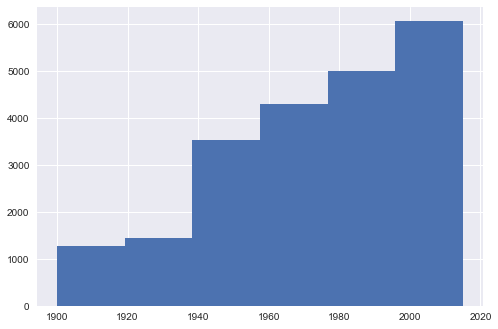

In [54]:
df_13.year_built_or_renovated.hist(bins=6)

#### Feature engineering 2

In [55]:
# This function facillitates with classifying homes as very old - very new
# input: column from dataframe
# output: list of integer values from 0-5
def old_new_classify(col):
    new_col = []
    for x in col:     # loops through each row
        if x < 1915.00:
            new_col.append(0)     # very old
        elif (x < 1935.00 and x > 1914.00):
            new_col.append(1)     # old
        elif (x < 1955.00 and x > 1934.00):
            new_col.append(2)     # somewhat old
        elif (x < 1975.00 and x > 1954.00):
            new_col.append(3)     # somewhat new
        elif (x < 1995.00 and x > 1974.00):
            new_col.append(4)     # new
        else:
            new_col.append(5)     # very new
    return new_col

In [56]:
df_13['old_new'] = old_new_classify(df_13['year_built_or_renovated'])

df_13

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_id,total_sqft,year_built_or_renovated,old_new
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,2,...,0.0,98178,47.5112,-122.257,1340,5650,100,6830.0,1955.0,3
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,2,...,1991.0,98125,47.7210,-122.319,1690,7639,101,9812.0,1991.0,4
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,2,...,0.0,98028,47.7379,-122.233,2720,8062,102,10770.0,1933.0,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,4,...,0.0,98136,47.5208,-122.393,1360,5000,103,6960.0,1965.0,3
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,2,...,0.0,98074,47.6168,-122.045,1800,7503,104,9760.0,1987.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,2,...,0.0,98103,47.6993,-122.346,1530,1509,21692,2661.0,2009.0,5
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,2,...,0.0,98146,47.5107,-122.362,1830,7200,21693,8123.0,2014.0,5
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,2,...,0.0,98144,47.5944,-122.299,1020,2007,21694,2370.0,2009.0,5
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,2,...,0.0,98027,47.5345,-122.069,1410,1287,21695,3988.0,2004.0,5


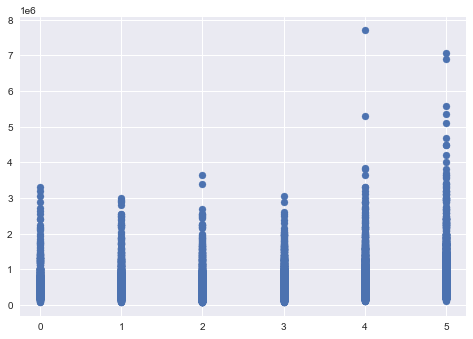

In [57]:
plt.scatter(x=df_13['old_new'], y=df_13.price)

It might be the case that some of the oldest homes might be considered historical and would thus increase the value of the home.

In [58]:
df_13.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sales_id', 'total_sqft',
       'year_built_or_renovated', 'old_new'],
      dtype='object')

#### Pre-Processing

In [59]:
# dropping some variables that are not needed.
to_drop = ['yr_built', 'yr_renovated', 'lat', 'long', 'year_built_or_renovated']
df_13i = df_13.copy()
for col in to_drop:
    df_13i = df_13i.drop([col], axis=1)
    
df_13i

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,sales_id,total_sqft,old_new
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,2,4,1180,0,98178,1340,5650,100,6830.0,3
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,2,4,2170,400,98125,1690,7639,101,9812.0,4
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,2,3,770,0,98028,2720,8062,102,10770.0,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,4,4,1050,910,98136,1360,5000,103,6960.0,3
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,2,5,1680,0,98074,1800,7503,104,9760.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,2,5,1530,0,98103,1530,1509,21692,2661.0,5
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,2,5,2310,0,98146,1830,7200,21693,8123.0,5
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,2,4,1020,0,98144,1020,2007,21694,2370.0,5
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,2,5,1600,0,98027,1410,1287,21695,3988.0,5


<AxesSubplot:>

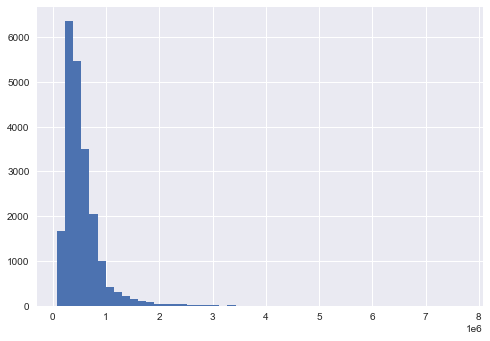

In [60]:
df_13i.price.hist(bins=50)

In [61]:
# remove the outlier of 33 bedrooms
df_13i = df_13i[df_13i['bedrooms'] < 32]

# log-normalize price
price_log = np.log(df_13i['price'])
df_13i = df_13i.drop(['price'], axis=1)
df_13i['price'] = price_log

df_13i.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,sales_id,total_sqft,old_new,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,2,4,1180,0,98178,1340,5650,100,6830.0,3,12.309982
1,6414100192,3,2.25,2570,7242,2.0,0,0,2,4,2170,400,98125,1690,7639,101,9812.0,4,13.195614
2,5631500400,2,1.00,770,10000,1.0,0,0,2,3,770,0,98028,2720,8062,102,10770.0,1,12.100712
3,2487200875,4,3.00,1960,5000,1.0,0,0,4,4,1050,910,98136,1360,5000,103,6960.0,3,13.311329
4,1954400510,3,2.00,1680,8080,1.0,0,0,2,5,1680,0,98074,1800,7503,104,9760.0,4,13.142166


In [62]:
# drop rows in df based on price z-score - using z-score because of norm distr.
max_price = df_13i.price.mean() + (3*df_13i.price.std())
min_price = df_13i.price.mean() - (3*df_13i.price.std())

df_13i = df_13i[(df_13i.price < max_price) & (df_13i.price > min_price)]
df_13i

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,sales_id,total_sqft,old_new,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,2,4,1180,0,98178,1340,5650,100,6830.0,3,12.309982
1,6414100192,3,2.25,2570,7242,2.0,0,0,2,4,2170,400,98125,1690,7639,101,9812.0,4,13.195614
2,5631500400,2,1.00,770,10000,1.0,0,0,2,3,770,0,98028,2720,8062,102,10770.0,1,12.100712
3,2487200875,4,3.00,1960,5000,1.0,0,0,4,4,1050,910,98136,1360,5000,103,6960.0,3,13.311329
4,1954400510,3,2.00,1680,8080,1.0,0,0,2,5,1680,0,98074,1800,7503,104,9760.0,4,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,2,5,1530,0,98103,1530,1509,21692,2661.0,5,12.793859
21593,6600060120,4,2.50,2310,5813,2.0,0,0,2,5,2310,0,98146,1830,7200,21693,8123.0,5,12.899220
21594,1523300141,2,0.75,1020,1350,2.0,0,0,2,4,1020,0,98144,1020,2007,21694,2370.0,5,12.904459
21595,291310100,3,2.50,1600,2388,2.0,0,0,2,5,1600,0,98027,1410,1287,21695,3988.0,5,12.899220


#### Log-transformations

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'sales_id'}>],
       [<AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'old_new'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      

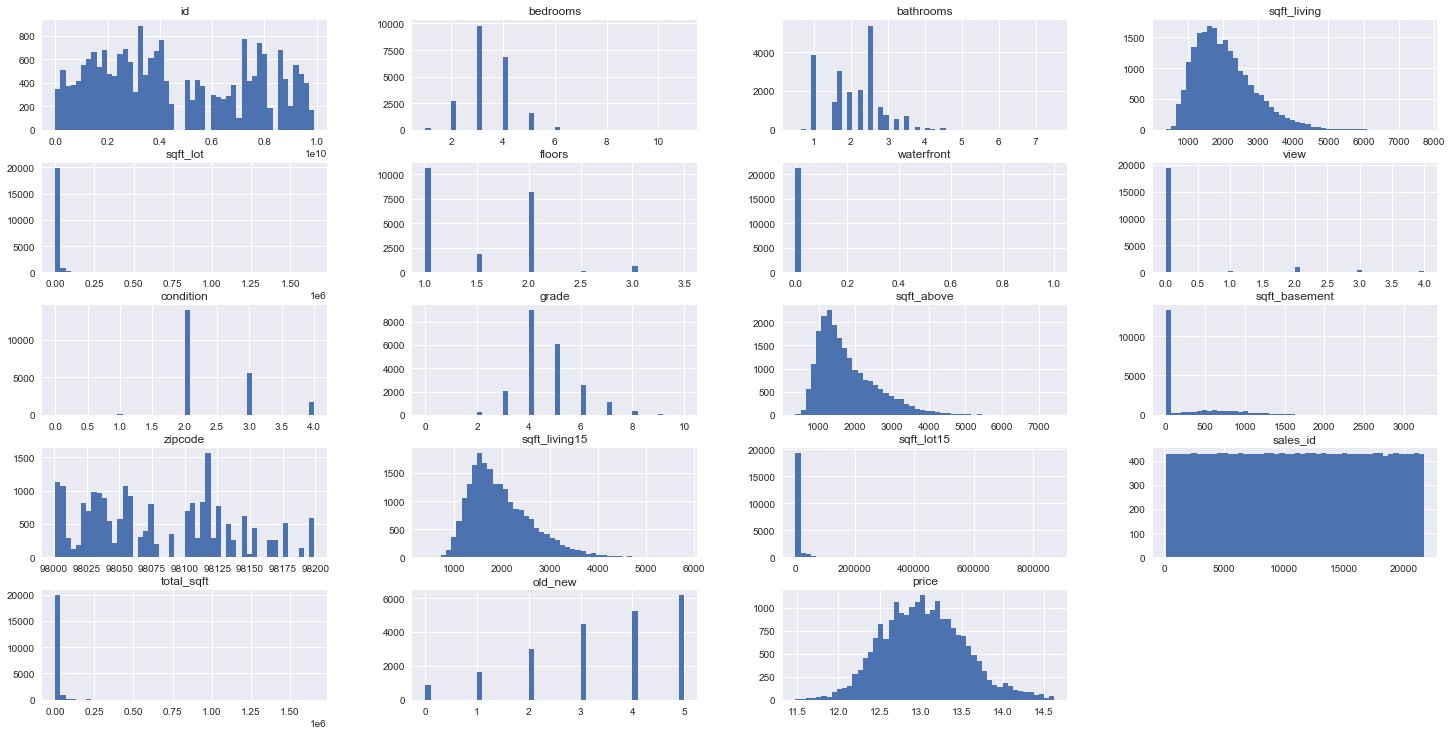

In [63]:
# plot histograms of all the columns in the set.
df_13i.hist(bins=50, figsize=(25, 12.5))

Investigate outliers of total_sqft

{'whiskers': [<matplotlib.lines.Line2D at 0x21aecef2fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21aecefc6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21aecef2c70>],
 'medians': [<matplotlib.lines.Line2D at 0x21aecefcd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21aecf01130>],
 'means': []}

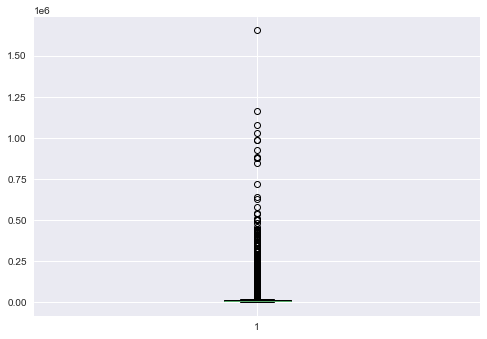

In [64]:
plt.boxplot(df_13i.total_sqft)

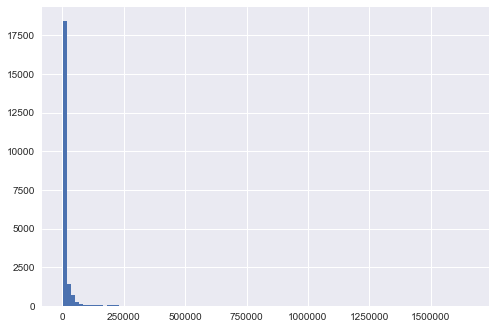

In [65]:
df_13i.total_sqft.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

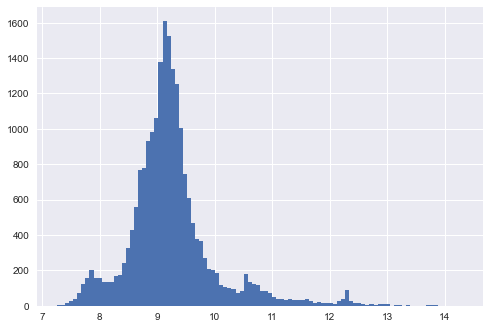

In [66]:
np.log(df_13i.total_sqft).hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

There are outliers for almost every zipcode. I will try to filter these out.

In [67]:
# dropping sqft_basement - don't need this anyway because it + sqft_above is
# equal to sqft_living - avoiding multicollinearity
df_13i = df_13i.drop(['sqft_basement'], axis=1)

In [68]:
# I noticed that index should be reset...
df_13i = df_13i.reset_index(drop=True)
df_13i

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,sales_id,total_sqft,old_new,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,2,4,1180,98178,1340,5650,100,6830.0,3,12.309982
1,6414100192,3,2.25,2570,7242,2.0,0,0,2,4,2170,98125,1690,7639,101,9812.0,4,13.195614
2,5631500400,2,1.00,770,10000,1.0,0,0,2,3,770,98028,2720,8062,102,10770.0,1,12.100712
3,2487200875,4,3.00,1960,5000,1.0,0,0,4,4,1050,98136,1360,5000,103,6960.0,3,13.311329
4,1954400510,3,2.00,1680,8080,1.0,0,0,2,5,1680,98074,1800,7503,104,9760.0,4,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21422,263000018,3,2.50,1530,1131,3.0,0,0,2,5,1530,98103,1530,1509,21692,2661.0,5,12.793859
21423,6600060120,4,2.50,2310,5813,2.0,0,0,2,5,2310,98146,1830,7200,21693,8123.0,5,12.899220
21424,1523300141,2,0.75,1020,1350,2.0,0,0,2,4,1020,98144,1020,2007,21694,2370.0,5,12.904459
21425,291310100,3,2.50,1600,2388,2.0,0,0,2,5,1600,98027,1410,1287,21695,3988.0,5,12.899220


Log-transformations on applicable variables.

In [69]:
var_list = ['sqft_above', 'sqft_living15', 'sqft_lot15',
            'total_sqft', 'sqft_lot', 'sqft_living']
df_13i = var_log_transform(var_list, df_13i)
df_13i.head()

,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sales_id,old_new,price,sqft_above,sqft_living15,sqft_lot15,total_sqft,sqft_lot,sqft_living
0,7129300520,3,1.00,1.0,0,0,2,4,98178,100,3,12.309982,7.073270,7.200425,8.639411,8.829080,8.639411,7.073270
1,6414100192,3,2.25,2.0,0,0,2,4,98125,101,4,13.195614,7.682482,7.432484,8.941022,9.191361,8.887653,7.851661
2,5631500400,2,1.00,1.0,0,0,2,3,98028,102,1,12.100712,6.646391,7.908387,8.994917,9.284520,9.210340,6.646391
3,2487200875,4,3.00,1.0,0,0,4,4,98136,103,3,13.311329,6.956545,7.215240,8.517193,8.847935,8.517193,7.580700
4,1954400510,3,2.00,1.0,0,0,2,5,98074,104,4,13.142166,7.426549,7.495542,8.923058,9.186048,8.997147,7.426549


#### Identify outliers and then drop them 

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98039'),
 Text(25, 0, '98040'),
 Text(26, 0, '98042'),
 Text(27, 0, '98045'),
 Text(28, 0, '98052'),
 Text(29, 0, '98053'),
 Text(30, 0, '98055'),
 Text(31, 0, '98056'),
 Text(32, 0, '98058'),
 Text(33, 0, '98059'),
 Text(34, 0, '98065'),
 Text(35, 0, '98070'),
 Text(36, 0, '98072'),
 Text(37, 0, '98074'),
 Text(38, 0, '98075'),
 Text(39, 0, '98077'),
 Text(40, 0, '98092'),
 Text(41, 0, '98102'),
 Text(42, 0, '98103'),
 Text(43, 0, '98105')

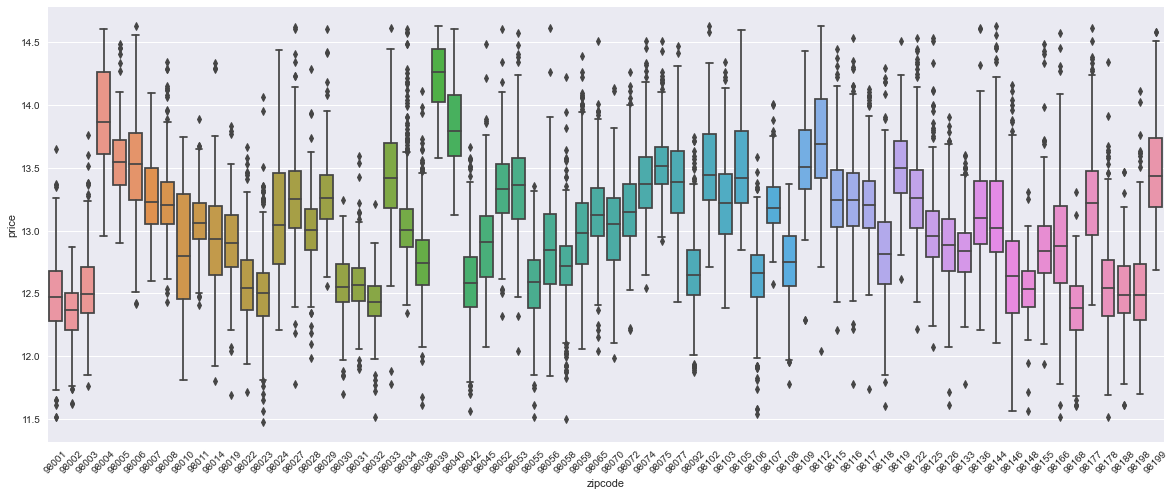

In [70]:
# start with zipcode - check for outliers with sns.boxplot
plt.figure(figsize=(20,8))
ax = sns.boxplot(x=df_13i.zipcode, y=df_13i.price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [71]:
zip_uniques = df_13i.zipcode.unique()

In [72]:
# for each zipcode, I will need to establish upper and lower bounds to then
# filter out outliers.
df_zips = df_13i.copy()     # will use this to merge with other dfs later.

for zip_c in zip_uniques:
    # create new df with current zipcode
    df_zipcode = pd.DataFrame()
    df_zipcode = df_13i[df_13i.zipcode == int(zip_c)]
    
    # find first and third quartiles
    q3, q1 = np.percentile(df_zipcode.price, [75 ,25])
    
    iqr = q3 - q1

    # define and drop outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    zip_d = int(zip_c)     # cast as int... avoids some error.
    
    for row in df_13i.index:
        if df_13i.loc[row, 'zipcode'] == zip_d:
            if (df_13i.loc[row, 'price'] > upper_bound) |  (df_13i.loc[row, 'price'] < lower_bound):
                df_zips = df_zips.drop(labels=row, axis=0)

df_zips

,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sales_id,old_new,price,sqft_above,sqft_living15,sqft_lot15,total_sqft,sqft_lot,sqft_living
0,7129300520,3,1.00,1.0,0,0,2,4,98178,100,3,12.309982,7.073270,7.200425,8.639411,8.829080,8.639411,7.073270
1,6414100192,3,2.25,2.0,0,0,2,4,98125,101,4,13.195614,7.682482,7.432484,8.941022,9.191361,8.887653,7.851661
3,2487200875,4,3.00,1.0,0,0,4,4,98136,103,3,13.311329,6.956545,7.215240,8.517193,8.847935,8.517193,7.580700
4,1954400510,3,2.00,1.0,0,0,2,5,98074,104,4,13.142166,7.426549,7.495542,8.923058,9.186048,8.997147,7.426549
5,7237550310,4,4.50,1.0,0,0,2,8,98053,105,5,14.022525,8.266164,8.468003,11.532042,11.583850,11.532042,8.597851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21422,263000018,3,2.50,3.0,0,0,2,5,98103,21692,5,12.793859,7.333023,7.333023,7.319202,7.886457,7.030857,7.333023
21423,6600060120,4,2.50,2.0,0,0,2,5,98146,21693,5,12.899220,7.745003,7.512071,8.881836,9.002455,8.667852,7.745003
21424,1523300141,2,0.75,2.0,0,0,2,4,98144,21694,5,12.904459,6.927558,6.927558,7.604396,7.770645,7.207860,6.927558
21425,291310100,3,2.50,2.0,0,0,2,5,98027,21695,5,12.899220,7.377759,7.251345,7.160069,8.291045,7.778211,7.377759


Reasons for creating new df (df_zips):
I want to identify all outliers from each independent variable first before dropping them from the main dataframe. I am doing this because dropping an outlier from one variable may affect how outliers are identified in another variable. 

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98039'),
 Text(25, 0, '98040'),
 Text(26, 0, '98042'),
 Text(27, 0, '98045'),
 Text(28, 0, '98052'),
 Text(29, 0, '98053'),
 Text(30, 0, '98055'),
 Text(31, 0, '98056'),
 Text(32, 0, '98058'),
 Text(33, 0, '98059'),
 Text(34, 0, '98065'),
 Text(35, 0, '98070'),
 Text(36, 0, '98072'),
 Text(37, 0, '98074'),
 Text(38, 0, '98075'),
 Text(39, 0, '98077'),
 Text(40, 0, '98092'),
 Text(41, 0, '98102'),
 Text(42, 0, '98103'),
 Text(43, 0, '98105')

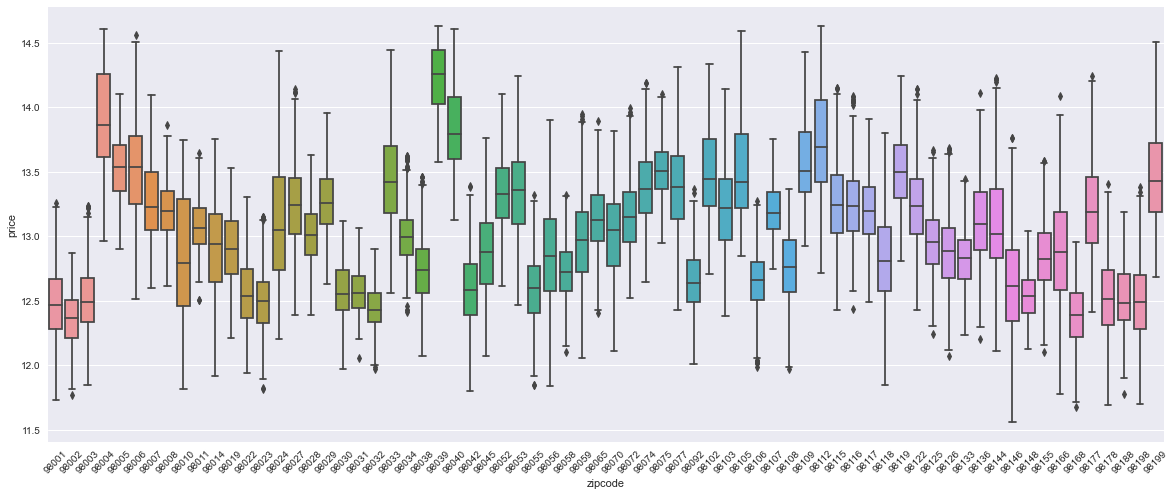

In [73]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x=df_zips.zipcode, y=df_zips.price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [74]:
# check counts for each zipcode to make sure there are enough datapoints.
df_zips.zipcode.value_counts(ascending=True)

98039     33
98148     52
98024     80
98102     99
98010    100
        ... 
98117    542
98052    567
98038    570
98115    576
98103    597
Name: zipcode, Length: 70, dtype: int64

Looks like my IQR filtering is a  little bit different than Seaborn's, but my code still managed to take out most of the outliers that Seaborn plots.
I'm going to look at other variables boxplots before and after identifying observations to filter out.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

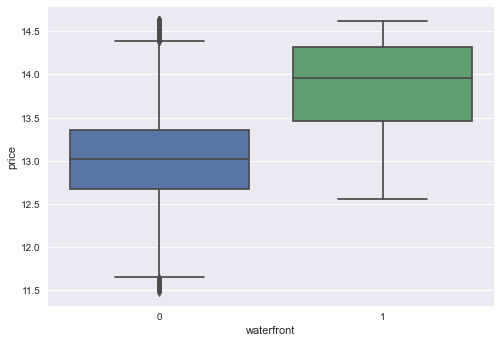

In [75]:
# explore other categorical variables
sns.boxplot(x=df_13i.waterfront, y=df_13i.price)

Filter categorical variables based on IQR - created helper function to do this based on code I used for zipcode filtering.

In [76]:
df_waterfront = df_13i.copy()
df_waterfront = IQR_filter_categorical('waterfront', df_waterfront)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

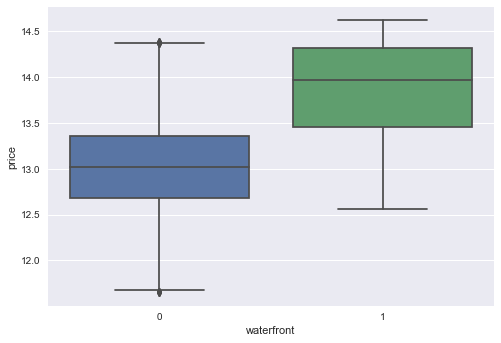

In [77]:
sns.boxplot(x=df_waterfront.waterfront, y=df_waterfront.price)

<AxesSubplot:xlabel='view', ylabel='price'>

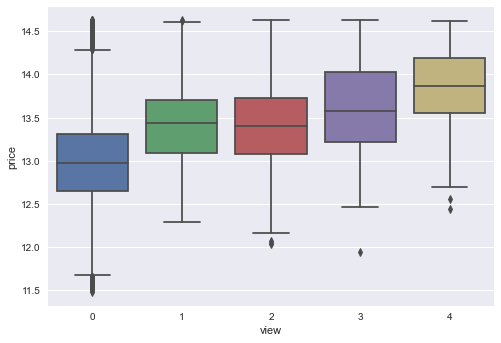

In [78]:
sns.boxplot(x=df_13i.view, y=df_13i.price)

In [79]:
df_view = df_13i.copy()
df_view = IQR_filter_categorical('view', df_view)

<AxesSubplot:xlabel='view', ylabel='price'>

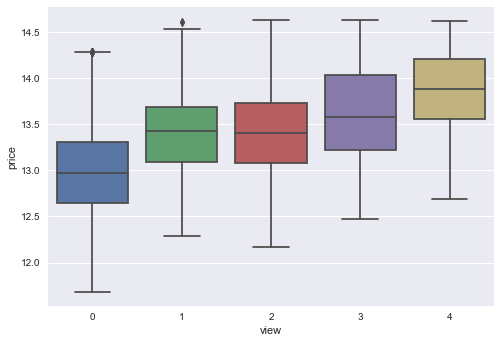

In [80]:
sns.boxplot(x=df_view.view, y=df_view.price)

In general, there is an increase in price as view rating gets higher.

<AxesSubplot:xlabel='condition', ylabel='price'>

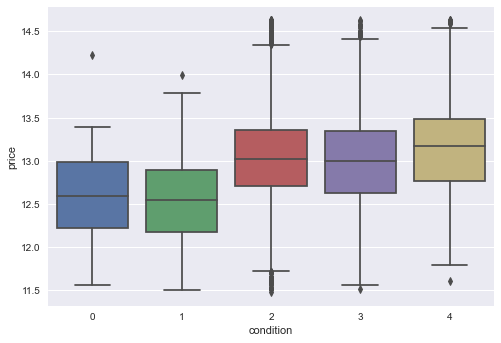

In [81]:
sns.boxplot(x=df_13i.condition, y=df_13i.price)

In [82]:
df_condition = df_13i.copy()
df_condition = IQR_filter_categorical('condition', df_condition)

In [83]:
df_grade = df_13i.copy()
df_grade = IQR_filter_categorical('grade', df_grade)

<AxesSubplot:xlabel='old_new', ylabel='price'>

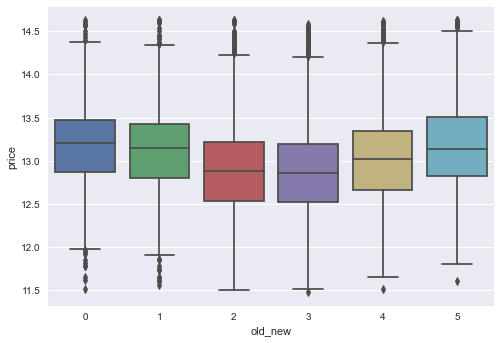

In [84]:
sns.boxplot(x=df_13i.old_new, y=df_13i.price)

In [85]:
df_old_new = df_13i.copy()
df_old_new = IQR_filter_categorical('old_new', df_old_new)

<AxesSubplot:xlabel='old_new', ylabel='price'>

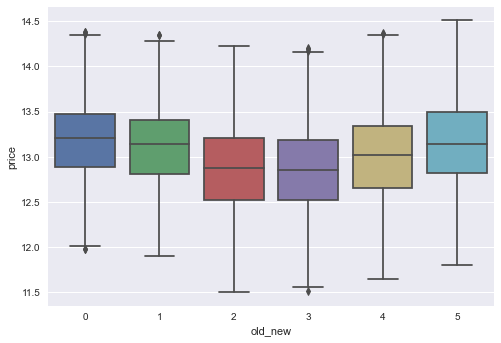

In [86]:
sns.boxplot(x=df_old_new.old_new, y=df_old_new.price)

In general, the oldest and newest homes are sold for the most, but this variable does not seem overwhelmingly descriptive of any particular trend.

From earlier finding: There are 176 homes that had two or more sales during the period of this dataset (2014-2015)

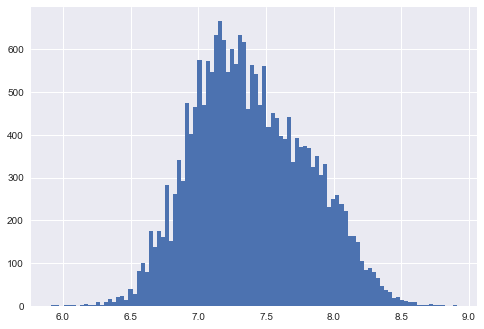

In [87]:
# investigate if I should use IQR or z-score filtering for other numerical 
# columns
df_13i.sqft_above.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

{'whiskers': [<matplotlib.lines.Line2D at 0x21af0797fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21af07a56d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21af0797c70>],
 'medians': [<matplotlib.lines.Line2D at 0x21af07a5d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21af07b3130>],
 'means': []}

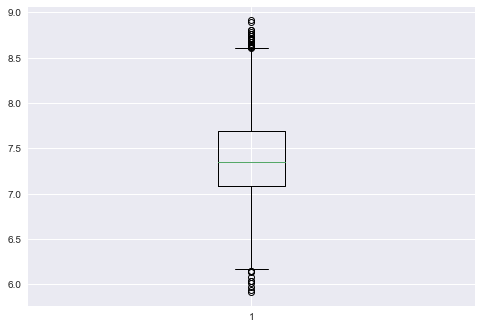

In [88]:
plt.boxplot(df_13i.sqft_above)

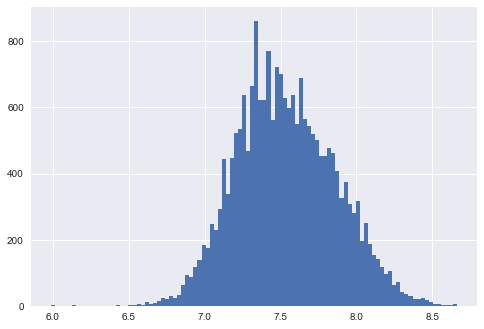

In [89]:
df_13i.sqft_living15.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

{'whiskers': [<matplotlib.lines.Line2D at 0x21af1c55a00>,
 'caps': [<matplotlib.lines.Line2D at 0x21af1c60100>,
 'boxes': [<matplotlib.lines.Line2D at 0x21af1c556a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21af1c607c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21af1c60b20>],
 'means': []}

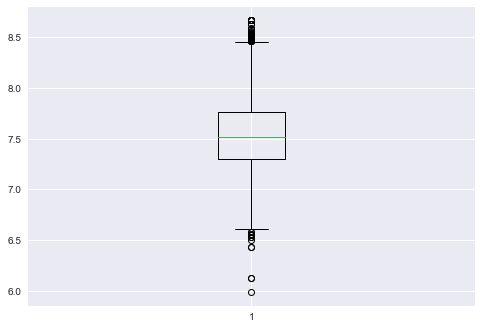

In [90]:
plt.boxplot(df_13i.sqft_living15)

{'whiskers': [<matplotlib.lines.Line2D at 0x21af1d2afa0>,
 'caps': [<matplotlib.lines.Line2D at 0x21af1d376a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21af1d2ac40>],
 'medians': [<matplotlib.lines.Line2D at 0x21af1d37d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x21af1c84100>],
 'means': []}

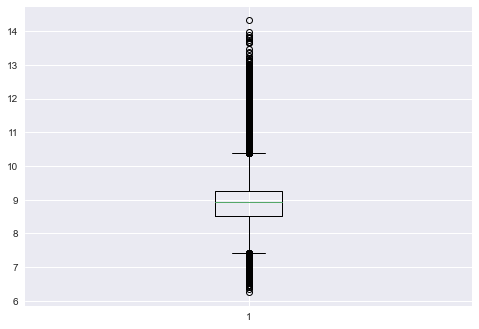

In [91]:
plt.boxplot(df_13i.sqft_lot)

In [92]:
# seems like sqft total filtering will allow for most extreme values to be
# filtered because it is combination between sqft_living and sqft_lot.
# but I will try filtering based on all numerical data IQRS
numericals = ['sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
              'total_sqft', 'bedrooms', 'bathrooms', 'floors', 'sqft_living']

# create IQR-filtered dataframes and then merge them together. 
# First, instantiate some dataframes
df_sa = df_13i.copy()
df_sl15 = df_13i.copy()
df_slot15 = df_13i.copy()
df_slot = df_13i.copy()
df_tots = df_13i.copy()
df_bed = df_13i.copy()
df_bath = df_13i.copy()
df_fl = df_13i.copy()
df_sl = df_13i.copy()

# apply filter to each new df
df_sa = IQR_filter_numerical(df_sa.sqft_above, df_sa)
df_sl15 = IQR_filter_numerical(df_sl15.sqft_living15, df_sl15)
df_slot15 = IQR_filter_numerical(df_slot15.sqft_lot15, df_slot15)
df_slot = IQR_filter_numerical(df_slot.sqft_lot, df_slot)
df_tots = IQR_filter_numerical(df_tots.total_sqft, df_tots)
df_bed = IQR_filter_numerical(df_bed.bedrooms, df_bed)
df_bath = IQR_filter_numerical(df_bath.bathrooms, df_bath)
df_fl = IQR_filter_numerical(df_fl.floors, df_fl)
df_sl = IQR_filter_numerical(df_sl.sqft_living, df_sl)

# merge the categorical & numerical dataframes back together using inner join
# (intersection of keys) to avoid re-adding outliers. Automatically drops on
# sales_id
df_num = df_sa.merge(
    df_sl15, how='inner', on=None).merge(
    df_slot15, how='inner', on=None).merge(
    df_slot, how='inner', on=None).merge(
    df_tots, how='inner', on=None).merge(
    df_bed, how='inner', on=None).merge(
    df_bath, how='inner', on=None).merge(
    df_fl, how='inner', on=None).merge(
    df_sl, how='inner', on=None).merge(
    df_old_new, how='inner', on=None).merge(
    df_grade, how='inner', on=None).merge(
    df_condition, how='inner', on=None).merge(
    df_view, how='inner', on=None).merge(
    df_waterfront, how='inner', on=None).merge(
    df_zips, how='inner', on=None)

df_num

,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sales_id,old_new,price,sqft_above,sqft_living15,sqft_lot15,total_sqft,sqft_lot,sqft_living
0,7129300520,3,1.00,1.0,0,0,2,4,98178,100,3,12.309982,7.073270,7.200425,8.639411,8.829080,8.639411,7.073270
1,6414100192,3,2.25,2.0,0,0,2,4,98125,101,4,13.195614,7.682482,7.432484,8.941022,9.191361,8.887653,7.851661
2,2487200875,4,3.00,1.0,0,0,4,4,98136,103,3,13.311329,6.956545,7.215240,8.517193,8.847935,8.517193,7.580700
3,1954400510,3,2.00,1.0,0,0,2,5,98074,104,4,13.142166,7.426549,7.495542,8.923058,9.186048,8.997147,7.426549
4,1321400060,3,2.25,2.0,0,0,2,4,98003,106,5,12.458775,7.447168,7.713338,8.827468,9.051813,8.827468,7.447168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17184,844000965,3,1.75,1.0,0,0,2,3,98010,21686,5,12.319401,7.313220,7.185387,9.332823,9.508072,9.389992,7.313220
17185,7852140040,3,2.50,2.0,0,0,2,5,98065,21687,5,13.136759,7.727535,7.727535,8.653645,8.962648,8.619027,7.727535
17186,3448900210,4,2.50,2.0,0,0,2,6,98056,21689,5,13.322337,7.832014,7.832014,8.703341,9.052868,8.703341,7.832014
17187,7936000429,4,3.50,2.0,0,0,2,6,98136,21690,5,13.825461,7.863267,7.625595,8.732305,9.278933,8.881836,8.163371


Dropped 4,408 total observations from original dataframe. 

{'whiskers': [<matplotlib.lines.Line2D at 0x21af1cf2370>,
 'caps': [<matplotlib.lines.Line2D at 0x21af1cf2a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x21af1ce3fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21af1cc8130>],
 'fliers': [<matplotlib.lines.Line2D at 0x21af1cc8490>],
 'means': []}

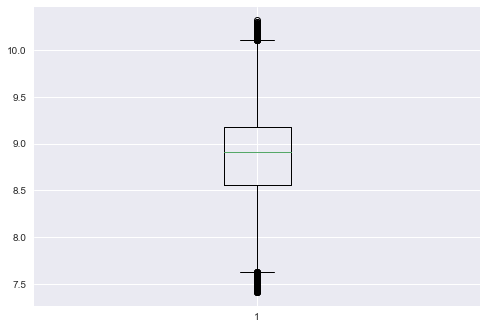

In [93]:
plt.boxplot(df_num.sqft_lot)

#### Create dummy variables

In [94]:
dum_list = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'old_new']
df_num = dum_transformation(dum_list, df_num)

In [95]:
# sanity check
df_num.head()

,id,bedrooms,bathrooms,floors,sales_id,price,sqft_above,sqft_living15,sqft_lot15,total_sqft,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,old_new_1,old_new_2,old_new_3,old_new_4,old_new_5
0,7129300520,3,1.00,1.0,100,12.309982,7.073270,7.200425,8.639411,8.829080,...,0,1,0,0,0,0,0,1,0,0
1,6414100192,3,2.25,2.0,101,13.195614,7.682482,7.432484,8.941022,9.191361,...,0,0,0,0,0,0,0,0,1,0
2,2487200875,4,3.00,1.0,103,13.311329,6.956545,7.215240,8.517193,8.847935,...,0,0,0,0,0,0,0,1,0,0
3,1954400510,3,2.00,1.0,104,13.142166,7.426549,7.495542,8.923058,9.186048,...,0,0,0,0,0,0,0,0,1,0
4,1321400060,3,2.25,2.0,106,12.458775,7.447168,7.713338,8.827468,9.051813,...,0,0,0,0,0,0,0,0,0,1


In [96]:
# can drop id and sales_id here before modeling
df_num = df_num.drop(['id', 'sales_id'], axis=1)
df_num

,bedrooms,bathrooms,floors,price,sqft_above,sqft_living15,sqft_lot15,total_sqft,sqft_lot,sqft_living,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,old_new_1,old_new_2,old_new_3,old_new_4,old_new_5
0,3,1.00,1.0,12.309982,7.073270,7.200425,8.639411,8.829080,8.639411,7.073270,...,0,1,0,0,0,0,0,1,0,0
1,3,2.25,2.0,13.195614,7.682482,7.432484,8.941022,9.191361,8.887653,7.851661,...,0,0,0,0,0,0,0,0,1,0
2,4,3.00,1.0,13.311329,6.956545,7.215240,8.517193,8.847935,8.517193,7.580700,...,0,0,0,0,0,0,0,1,0,0
3,3,2.00,1.0,13.142166,7.426549,7.495542,8.923058,9.186048,8.997147,7.426549,...,0,0,0,0,0,0,0,0,1,0
4,3,2.25,2.0,12.458775,7.447168,7.713338,8.827468,9.051813,8.827468,7.447168,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17184,3,1.75,1.0,12.319401,7.313220,7.185387,9.332823,9.508072,9.389992,7.313220,...,0,0,0,0,0,0,0,0,0,1
17185,3,2.50,2.0,13.136759,7.727535,7.727535,8.653645,8.962648,8.619027,7.727535,...,0,0,0,0,0,0,0,0,0,1
17186,4,2.50,2.0,13.322337,7.832014,7.832014,8.703341,9.052868,8.703341,7.832014,...,0,0,0,0,0,0,0,0,0,1
17187,4,3.50,2.0,13.825461,7.863267,7.625595,8.732305,9.278933,8.881836,8.163371,...,0,0,0,0,0,0,0,0,0,1


#### Check linearity assumption

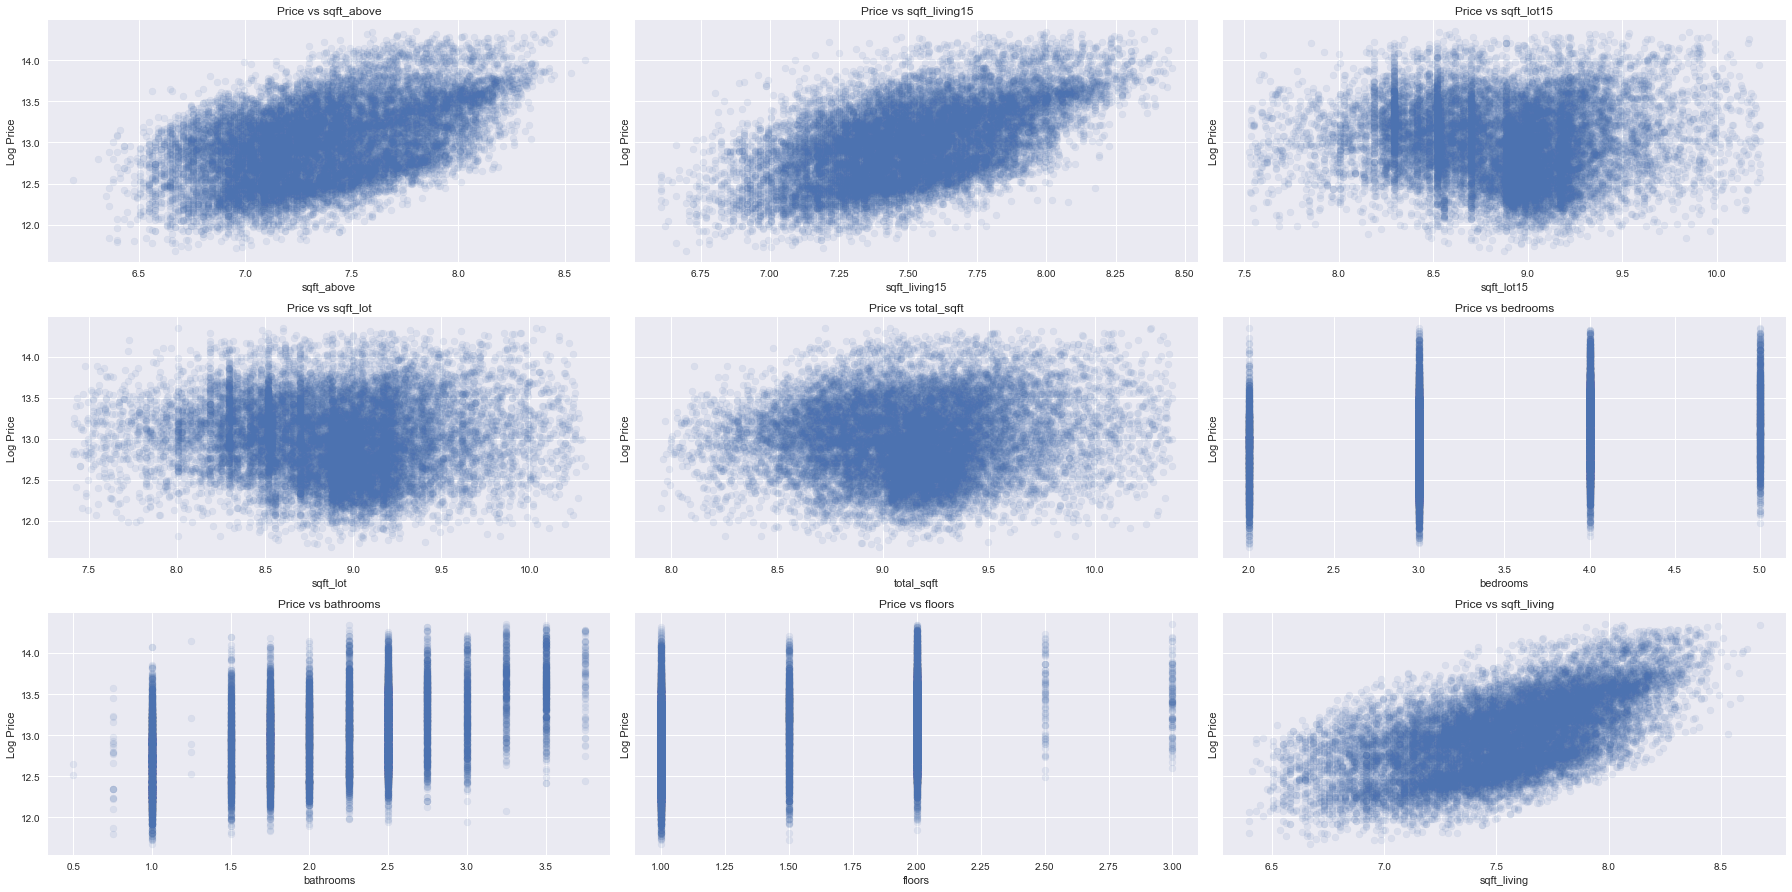

In [97]:
# visualize scatterplots of histograms with price as y variable and numerical
# variables as x variables: 'sqft_above', 'sqft_living15', 
# 'sqft_lot15','total_sqft', bedrooms, bathrooms, floors

numericals = ['sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
              'total_sqft', 'bedrooms', 'bathrooms', 'floors', 'sqft_living']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), numericals):
    ax.scatter(df_num[column], df_num['price'], label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Log Price')

fig.tight_layout()

Observations: doesn't really seem like sqft_lot15 or floors are linearly related with price. Floors doesn't either. sqft_lot, bedrooms, and total_sqft may be very roughly linearly related with price.

In [98]:
# definitely safe to remove sqft_lot15 due to lack of linearity
df_num = df_num.drop(['sqft_lot15'], axis=1)

#### Remove very highly correlating features

In [99]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_num.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

# lower bound of .75 to avoid multicollinearity
df_mc[(df_mc.cc>.75) & (df_mc.cc<1)] 

,cc
pairs,
"(sqft_lot, total_sqft)",0.976910
"(sqft_above, sqft_living)",0.827449
"(condition_2, condition_3)",0.808586
"(sqft_living, bathrooms)",0.764186


Dropping variables with high correlation values

In [100]:
to_drop = ['sqft_lot', 'sqft_living', 'condition_2']
for var in to_drop:
       df_num = df_num.drop([var], axis=1)
df_num.describe()

,bedrooms,bathrooms,floors,price,sqft_above,sqft_living15,total_sqft,waterfront_1,view_1,view_2,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,old_new_1,old_new_2,old_new_3,old_new_4,old_new_5
count,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,...,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000
mean,3.359765,2.028245,1.424719,12.994224,7.365838,7.519951,9.138305,0.001164,0.015126,0.041364,...,0.012973,0.014021,0.007156,0.014195,0.014311,0.083949,0.155448,0.229682,0.237768,0.249346
std,0.783870,0.679184,0.488499,0.464046,0.388539,0.302016,0.395437,0.034092,0.122057,0.199136,...,0.113163,0.117579,0.084291,0.118298,0.118775,0.277319,0.362342,0.420640,0.425729,0.432647
min,2.000000,0.500000,1.000000,11.679499,6.194405,6.606650,7.950502,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.500000,1.000000,12.647548,7.081709,7.306531,8.881003,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,12.983101,7.333023,7.506592,9.142062,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2.000000,13.321214,7.649693,7.727535,9.369137,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.750000,3.000000,14.352004,8.594154,8.455318,10.368322,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model

In [101]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_num)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     977.8
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:31:48   Log-Likelihood:                 5242.5
No. Observations:               12891   AIC:                        -1.029e+04
Df Residuals:                   12794   BIC:                            -9567.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.4462      0.108     77.908

#### Check assumptions

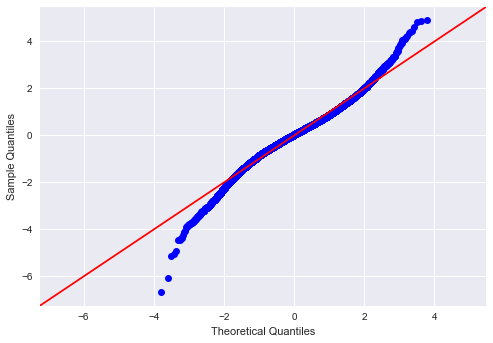

In [102]:
sm_check_resid_normality(res)

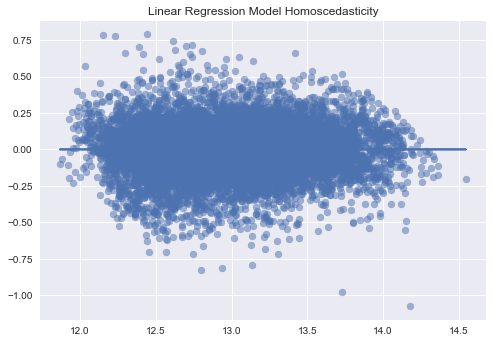

In [103]:
sm_check_scedas(res, df_train_y, X)

Multicollinearity too high (checked with VIF and Statsmodels produced a warning). VIF calculator check is not reproduced here because of long runtime.

#### Post-model feature elimination

In [104]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_num.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

# Conservative lower bound of .5 to avoid multicollinearity
df_mc[(df_mc.cc>.5) & (df_mc.cc<1)] 

,cc
pairs,
"(floors, sqft_above)",0.695655
"(sqft_above, sqft_living15)",0.687042
"(sqft_above, bathrooms)",0.683225
"(sqft_living15, bathrooms)",0.589879
"(old_new_5, floors)",0.567949
"(grade_4, grade_5)",0.566592
"(price, sqft_living15)",0.557884
"(bathrooms, floors)",0.551639
"(sqft_above, old_new_5)",0.512558


In [105]:
# drop variables that have high correlation with each other
to_drop = ['grade_4', 'sqft_above', 'sqft_living15', 'bathrooms', 'floors']
for var in to_drop:
       df_num = df_num.drop([var], axis=1)
df_num.describe()

,bedrooms,price,total_sqft,waterfront_1,view_1,view_2,view_3,view_4,condition_1,condition_3,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,old_new_1,old_new_2,old_new_3,old_new_4,old_new_5
count,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,...,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000
mean,3.359765,12.994224,9.138305,0.001164,0.015126,0.041364,0.018267,0.006632,0.006399,0.277852,...,0.012973,0.014021,0.007156,0.014195,0.014311,0.083949,0.155448,0.229682,0.237768,0.249346
std,0.783870,0.464046,0.395437,0.034092,0.122057,0.199136,0.133921,0.081170,0.079742,0.447953,...,0.113163,0.117579,0.084291,0.118298,0.118775,0.277319,0.362342,0.420640,0.425729,0.432647
min,2.000000,11.679499,7.950502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,12.647548,8.881003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,12.983101,9.142062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,13.321214,9.369137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,14.352004,10.368322,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model

In [106]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_num)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     845.7
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:31:49   Log-Likelihood:                 4128.1
No. Observations:               12891   AIC:                            -8072.
Df Residuals:                   12799   BIC:                            -7385.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.7047      0.053    202.262

Multiple columns with too high of multicollinearity (checked with VIF). Code not produced here due to high runtime.

#### Post-model feature elim.

In [107]:
# dropping zipcodes with high p-vals
to_drop = ['zipcode_98002', 'zipcode_98022', 'zipcode_98023', 'zipcode_98032',
          'zipcode_98092']
for t in to_drop:
    df_num = df_num.drop([t], axis=1)

#### Model

In [108]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_num)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     895.2
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:31:49   Log-Likelihood:                 4127.4
No. Observations:               12891   AIC:                            -8081.
Df Residuals:                   12804   BIC:                            -7431.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.7183      0.051    209.271

bedrooms and total_sqft with VIF (multicollinearity) calculations of above 10. Going to drop these.

#### Post-model feature selection

In [109]:
# Drop sqft_above, sqft_living15
to_drop = ['total_sqft', 'bedrooms']
for var in to_drop:
       df_num = df_num.drop([var], axis=1)
df_num.describe()

,price,waterfront_1,view_1,view_2,view_3,view_4,condition_1,condition_3,condition_4,grade_2,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,old_new_1,old_new_2,old_new_3,old_new_4,old_new_5
count,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,...,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000
mean,12.994224,0.001164,0.015126,0.041364,0.018267,0.006632,0.006399,0.277852,0.085636,0.008145,...,0.012973,0.014021,0.007156,0.014195,0.014311,0.083949,0.155448,0.229682,0.237768,0.249346
std,0.464046,0.034092,0.122057,0.199136,0.133921,0.081170,0.079742,0.447953,0.279834,0.089883,...,0.113163,0.117579,0.084291,0.118298,0.118775,0.277319,0.362342,0.420640,0.425729,0.432647
min,11.679499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.647548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.983101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.321214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.352004,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model

In [110]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_num)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     779.1
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:31:50   Log-Likelihood:                 3240.0
No. Observations:               12891   AIC:                            -6310.
Df Residuals:                   12806   BIC:                            -5676.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3851      0.012   1068.608

Multicollinearity is low enough (checked with VIF) - output of code not reproduced because of runtime expense.

In [111]:
# drop variables that have too high of p-value
to_drop = ['old_new_1', 'zipcode_98003']
for var in to_drop:
       df_num = df_num.drop([var], axis=1)
df_num.describe()

,price,waterfront_1,view_1,view_2,view_3,view_4,condition_1,condition_3,condition_4,grade_2,...,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,old_new_2,old_new_3,old_new_4,old_new_5
count,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,...,17189.00000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000
mean,12.994224,0.001164,0.015126,0.041364,0.018267,0.006632,0.006399,0.277852,0.085636,0.008145,...,0.01373,0.012973,0.014021,0.007156,0.014195,0.014311,0.155448,0.229682,0.237768,0.249346
std,0.464046,0.034092,0.122057,0.199136,0.133921,0.081170,0.079742,0.447953,0.279834,0.089883,...,0.11637,0.113163,0.117579,0.084291,0.118298,0.118775,0.362342,0.420640,0.425729,0.432647
min,11.679499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.647548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.983101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.321214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.352004,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_num)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     798.1
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:31:50   Log-Likelihood:                 3239.1
No. Observations:               12891   AIC:                            -6312.
Df Residuals:                   12808   BIC:                            -5693.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3850      0.009   1366.706

#### Check assumptions

Multicollinearity is low enough (checked with VIF) - output of code not reproduced because of runtime expense.

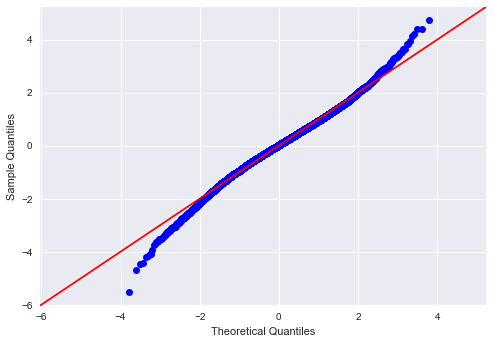

In [113]:
sm_check_resid_normality(res)

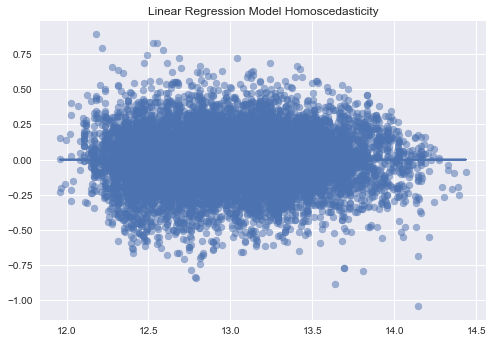

In [114]:
sm_check_scedas(res, df_train_y, X)

#### Calculate MAE

In [115]:
# generate predictions
ypred = res.predict(X)

z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

70069.54766013002

In [116]:
# store coefficient table for later
coefs = abs(res.params).sort_values(ascending=False)
print(coefs[:60])

const            12.384991
zipcode_98039     1.326257
zipcode_98004     1.132288
zipcode_98112     1.008396
zipcode_98040     0.990950
zipcode_98119     0.960923
zipcode_98109     0.949783
zipcode_98105     0.919223
zipcode_98102     0.917920
zipcode_98199     0.881269
zipcode_98005     0.875115
zipcode_98103     0.823190
zipcode_98033     0.799006
zipcode_98115     0.796442
zipcode_98107     0.789965
grade_9           0.784612
zipcode_98117     0.771484
zipcode_98122     0.743295
zipcode_98116     0.736924
grade_8           0.730800
zipcode_98006     0.711303
zipcode_98008     0.701672
zipcode_98007     0.682491
zipcode_98144     0.674092
zipcode_98052     0.671684
zipcode_98136     0.652907
zipcode_98027     0.630337
zipcode_98075     0.621217
zipcode_98053     0.615527
zipcode_98177     0.611212
zipcode_98074     0.580868
zipcode_98077     0.576781
grade_7           0.569531
zipcode_98029     0.569220
zipcode_98125     0.565618
zipcode_98034     0.546877
zipcode_98011     0.517180
z

In [ ]:
df_final = df_num.copy()

### Model 4

Preprocessing in similar way as Model 3

#### Initial Pre-processing

In [117]:
df_m = df_with_date.copy()
# dropping some variables that are not needed.
to_drop = ['yr_built', 'yr_renovated', 'lat', 'long']

for col in to_drop:
    df_m = df_m.drop([col], axis=1)
    
# remove the outlier of 33 bedrooms
df_m = df_m[df_m['bedrooms'] < 32]

df_m

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,sales_id
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,2,4,1180,0,98178,1340,5650,100
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,2,4,2170,400,98125,1690,7639,101
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,2,3,770,0,98028,2720,8062,102
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,4,4,1050,910,98136,1360,5000,103
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,2,5,1680,0,98074,1800,7503,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,2,5,1530,0,98103,1530,1509,21692
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,2,5,2310,0,98146,1830,7200,21693
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,2,4,1020,0,98144,1020,2007,21694
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,2,5,1600,0,98027,1410,1287,21695


{'whiskers': [<matplotlib.lines.Line2D at 0x21aeab067f0>,
 'caps': [<matplotlib.lines.Line2D at 0x21aeab06eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21aeab06490>],
 'medians': [<matplotlib.lines.Line2D at 0x21aeab125b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21aeab12910>],
 'means': []}

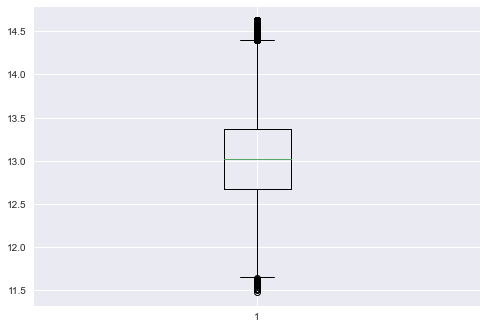

In [118]:
# log-normalize price to then drop outliers
price_log = np.log(df_m['price'])
df_m = df_m.drop(['price'], axis=1)
df_m['price'] = price_log


# drop rows in df based on price z-score - using z-score because of norm distr.
# dropping values outside two standard deviations above and below (removes 
# about 5% of the most extreme values).
max_price = df_m.price.mean() + (3*df_m.price.std())
min_price = df_m.price.mean() - (3*df_m.price.std())

df_m = df_m[(df_m.price < max_price) & (df_m.price > min_price)]

plt.boxplot(df_m.price)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'sales_id'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

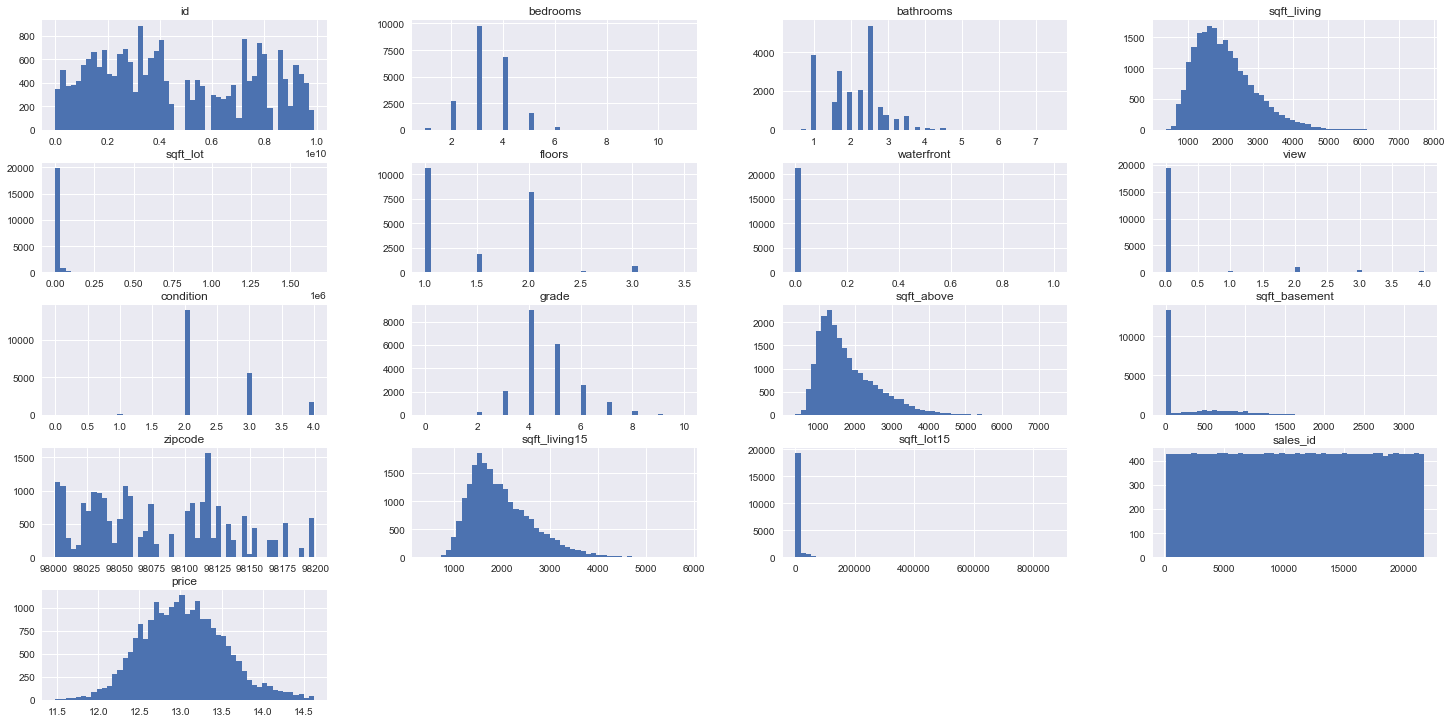

In [119]:
# plot histograms of all the columns in the set.
df_m.hist(bins=50, figsize=(25, 12.5))

Out of all the quant categories, I will just keep sqft_above, sqft_living15, and bedrooms. I will drop all other numericals to avoid non-normal variables or difficult normal transformational variable and to avoid multicollinearity. For example, sqrft_living is too highly correlated with price.

In [120]:
to_drop = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement',
           'sqft_lot15', 'id']
for var in to_drop:
       df_m = df_m.drop([var], axis=1)
df_m.describe()

,bedrooms,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sales_id,price
count,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000,21427.000000
mean,3.365893,0.005087,0.221030,2.409997,4.638073,1773.135577,98078.049330,1976.449060,10898.182853,13.037355
std,0.898452,0.071144,0.739695,0.649666,1.140471,797.594979,53.467872,671.561984,6232.609017,0.503114
min,1.000000,0.000000,0.000000,0.000000,0.000000,370.000000,98001.000000,399.000000,100.000000,11.477298
25%,3.000000,0.000000,0.000000,2.000000,4.000000,1190.000000,98033.000000,1480.000000,5502.500000,12.678885
50%,3.000000,0.000000,0.000000,2.000000,4.000000,1560.000000,98065.000000,1830.000000,10897.000000,13.017003
75%,4.000000,0.000000,0.000000,3.000000,5.000000,2190.000000,98118.000000,2350.000000,16293.500000,13.367660
max,11.000000,1.000000,4.000000,4.000000,10.000000,7420.000000,98199.000000,5790.000000,21696.000000,14.626441


In [121]:
df_m

,date,bedrooms,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sales_id,price
0,10/13/2014,3,0,0,2,4,1180,98178,1340,100,12.309982
1,12/9/2014,3,0,0,2,4,2170,98125,1690,101,13.195614
2,2/25/2015,2,0,0,2,3,770,98028,2720,102,12.100712
3,12/9/2014,4,0,0,4,4,1050,98136,1360,103,13.311329
4,2/18/2015,3,0,0,2,5,1680,98074,1800,104,13.142166
...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,3,0,0,2,5,1530,98103,1530,21692,12.793859
21593,2/23/2015,4,0,0,2,5,2310,98146,1830,21693,12.899220
21594,6/23/2014,2,0,0,2,4,1020,98144,1020,21694,12.904459
21595,1/16/2015,3,0,0,2,5,1600,98027,1410,21695,12.899220


In [122]:
df_m.date.describe()

count         21427
unique          372
top       6/23/2014
freq            141
Name: date, dtype: object

In [123]:
df_m.date.isnull().values.any()

False

In [124]:
type(df_m.date[1])

str

#### Feature engineering - bin date into seasons (spring, summer, fall, winter)

In [125]:
months_list = []
for d in df_m.date:
    if d.startswith('1/') or d.startswith('12') or d.startswith('2/'):
        months_list.append(0)     # 0 is winter
    elif d.startswith('3/') or d.startswith('4/') or d.startswith('5/'):
        months_list.append(1)     # 1 is spring
    elif d.startswith('6/') or d.startswith('7/') or d.startswith('8/'):
        months_list.append(2)     # 2 is summer
    else:
        months_list.append(3)     # 3 is fall

In [126]:
# append season to df
df_m['season'] = months_list
df_m

,date,bedrooms,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sales_id,price,season
0,10/13/2014,3,0,0,2,4,1180,98178,1340,100,12.309982,3
1,12/9/2014,3,0,0,2,4,2170,98125,1690,101,13.195614,0
2,2/25/2015,2,0,0,2,3,770,98028,2720,102,12.100712,0
3,12/9/2014,4,0,0,4,4,1050,98136,1360,103,13.311329,0
4,2/18/2015,3,0,0,2,5,1680,98074,1800,104,13.142166,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,3,0,0,2,5,1530,98103,1530,21692,12.793859,1
21593,2/23/2015,4,0,0,2,5,2310,98146,1830,21693,12.899220,0
21594,6/23/2014,2,0,0,2,4,1020,98144,1020,21694,12.904459,2
21595,1/16/2015,3,0,0,2,5,1600,98027,1410,21695,12.899220,0


<AxesSubplot:>

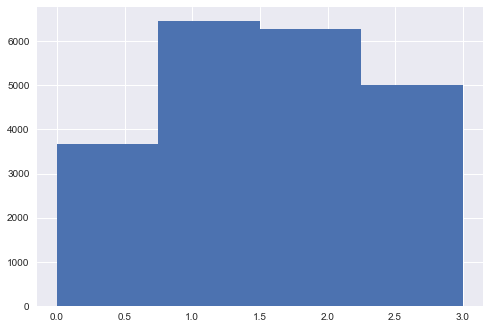

In [127]:
df_m.season.hist(bins=4)

In [128]:
df_m = df_m.drop(['date'], axis=1)

#### Log transformations

In [129]:
var_list = ['bedrooms', 'sqft_living15', 'sqft_above']
df_m = var_log_transform(var_list, df_m)

array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'sales_id'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_above'}>, <AxesSubplot:>]],
      dtype=object)

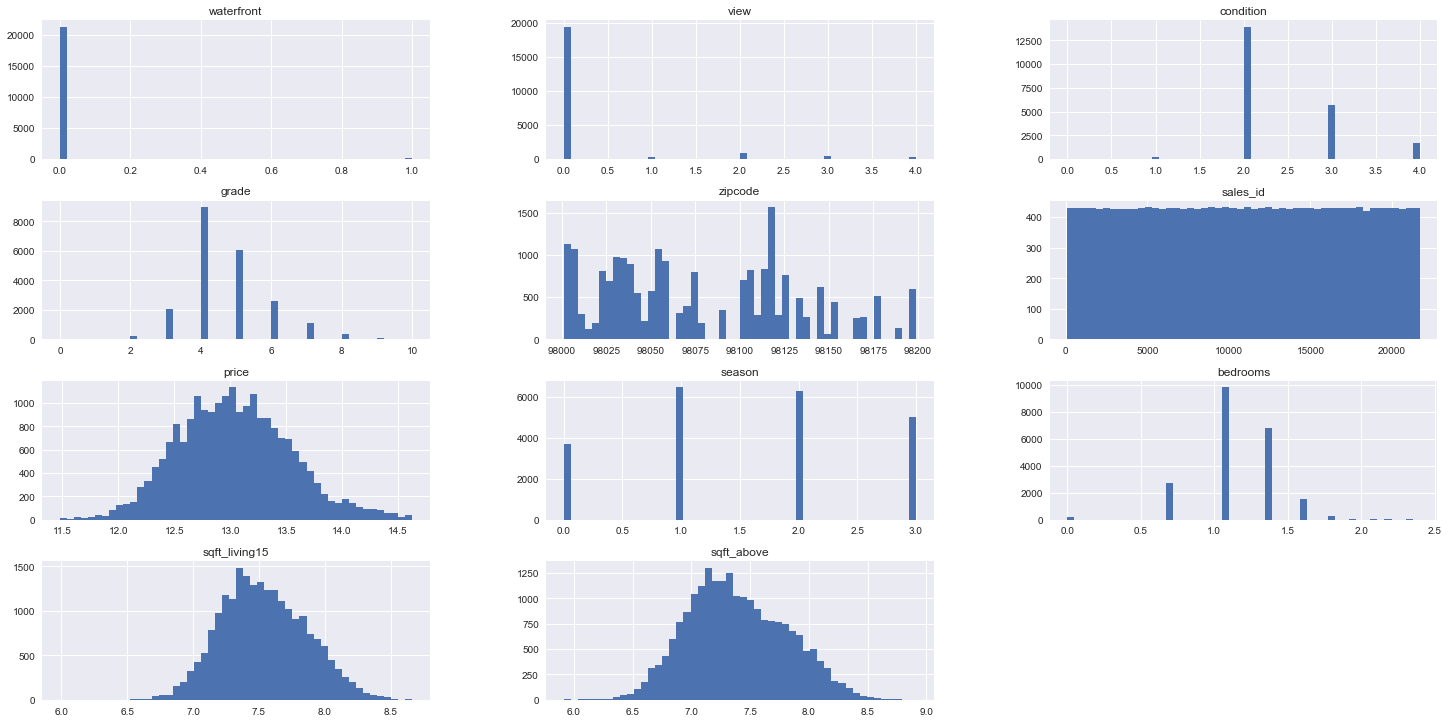

In [130]:
df_m.hist(bins=50, figsize=(25, 12.5))

#### Pre-processing part 2

In [131]:
df_m.columns

Index(['waterfront', 'view', 'condition', 'grade', 'zipcode', 'sales_id',
       'price', 'season', 'bedrooms', 'sqft_living15', 'sqft_above'],
      dtype='object')

In [132]:
# applying same filtering methods as model 3
numericals = ['bedrooms', 'sqft_living15', 'sqft_above']

# create IQR-filtered dataframes and then merge them together. 
# First, instantiate some dataframes
df_sa = df_m.copy()
df_sl15 = df_m.copy()
df_bed = df_m.copy()
df_waterfront = df_m.copy()
df_view = df_m.copy()
df_condition = df_m.copy()
df_grade = df_m.copy()
df_zipcode = df_m.copy()
df_season = df_m.copy()

# apply filter to each new df
df_sa = IQR_filter_numerical(df_sa.sqft_above, df_sa)
df_sl15 = IQR_filter_numerical(df_sl15.sqft_living15, df_sl15)
df_bed = IQR_filter_numerical(df_bed.bedrooms, df_bed)
df_waterfront = IQR_filter_categorical('waterfront', df_waterfront)
df_view = IQR_filter_categorical('view', df_view)
df_condition = IQR_filter_categorical('condition', df_condition)
df_grade = IQR_filter_categorical('grade', df_grade)
df_zipcode = IQR_filter_categorical('zipcode', df_zipcode)
df_season = IQR_filter_categorical('season', df_season)

# merge the categorical & numerical dataframes back together using inner join
# (intersection of keys) to avoid re-adding outliers. Automatically drops on
# sales_id
df_num = pd.DataFrame()
df_num = df_sa.merge(
    df_sl15, how='inner', on=None).merge(
    df_bed, how='inner', on=None).merge(
    df_grade, how='inner', on=None).merge(
    df_condition, how='inner', on=None).merge(
    df_view, how='inner', on=None).merge(
    df_waterfront, how='inner', on=None).merge(
    df_zipcode, how='inner', on=None).merge(
    df_season, how='inner', on=None)

df_num

,waterfront,view,condition,grade,zipcode,sales_id,price,season,bedrooms,sqft_living15,sqft_above
0,0,0,2,4,98178,100,12.309982,3,1.098612,7.200425,7.073270
1,0,0,2,4,98125,101,13.195614,0,1.098612,7.432484,7.682482
2,0,0,4,4,98136,103,13.311329,0,1.386294,7.215240,6.956545
3,0,0,2,5,98074,104,13.142166,0,1.098612,7.495542,7.426549
4,0,0,2,4,98003,106,12.458775,2,1.098612,7.713338,7.447168
...,...,...,...,...,...,...,...,...,...,...,...
20360,0,0,2,5,98103,21692,12.793859,1,1.098612,7.333023,7.333023
20361,0,0,2,5,98146,21693,12.899220,0,1.386294,7.512071,7.745003
20362,0,0,2,4,98144,21694,12.904459,2,0.693147,6.927558,6.927558
20363,0,0,2,5,98027,21695,12.899220,0,1.098612,7.251345,7.377759


Dropped 1,241 rows

In [133]:
# going to point df_m to df_num so that I don't have to edit all my code...
df_m = pd.DataFrame()
df_m = df_num.copy()
df_m

,waterfront,view,condition,grade,zipcode,sales_id,price,season,bedrooms,sqft_living15,sqft_above
0,0,0,2,4,98178,100,12.309982,3,1.098612,7.200425,7.073270
1,0,0,2,4,98125,101,13.195614,0,1.098612,7.432484,7.682482
2,0,0,4,4,98136,103,13.311329,0,1.386294,7.215240,6.956545
3,0,0,2,5,98074,104,13.142166,0,1.098612,7.495542,7.426549
4,0,0,2,4,98003,106,12.458775,2,1.098612,7.713338,7.447168
...,...,...,...,...,...,...,...,...,...,...,...
20360,0,0,2,5,98103,21692,12.793859,1,1.098612,7.333023,7.333023
20361,0,0,2,5,98146,21693,12.899220,0,1.386294,7.512071,7.745003
20362,0,0,2,4,98144,21694,12.904459,2,0.693147,6.927558,6.927558
20363,0,0,2,5,98027,21695,12.899220,0,1.098612,7.251345,7.377759


In [134]:
df_m = df_m.drop(['sales_id'], axis=1)

#### Check linearity assumption

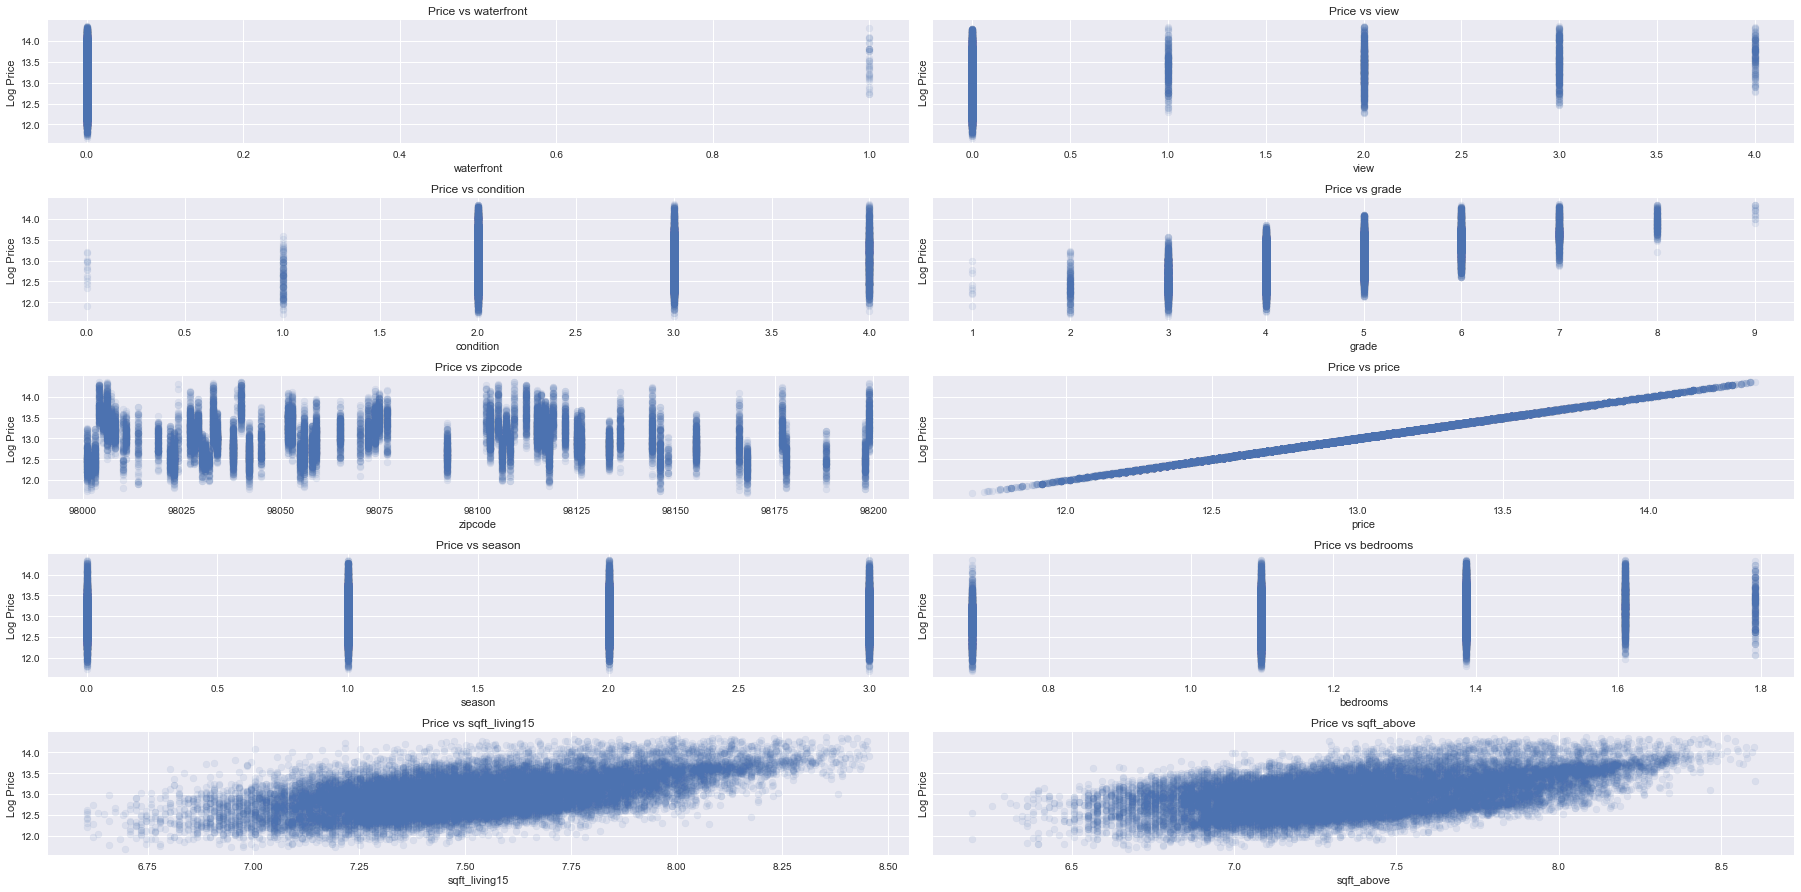

In [135]:
# visualize scatterplots of histograms with price as y variable

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), df_m.columns):
    ax.scatter(df_m[column], df_m['price'], label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Log Price')

fig.tight_layout()

#### Dummy variables

In [137]:
categoricals = ['waterfront', 'view', 'condition', 'grade', 'zipcode',
                'season'] 
df_m = dum_transformation(categoricals, df_m)

#### Check high correlating features

In [138]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_m.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.5) & (df_mc.cc<1)]

,cc
pairs,
"(condition_2, condition_3)",0.815984
"(sqft_living15, sqft_above)",0.698070
"(sqft_living15, price)",0.566820
"(grade_4, grade_5)",0.560652
"(sqft_above, price)",0.522508
"(bedrooms, sqft_above)",0.517815


In [139]:
# drop condition 2, sqft_living15, grade 4, bedrooms
to_drop = ['sqft_living15', 'grade_4', 'condition_2', 'bedrooms']
for var in to_drop:
       df_m = df_m.drop([var], axis=1)
df_m.describe()

,price,sqft_above,waterfront_1,view_1,view_2,view_3,view_4,condition_1,condition_3,condition_4,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,season_1,season_2,season_3
count,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,...,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000
mean,13.017867,7.380614,0.001866,0.013995,0.041689,0.019445,0.007464,0.006973,0.265554,0.078664,...,0.011883,0.012227,0.011883,0.012129,0.006433,0.012472,0.014829,0.301841,0.293985,0.233538
std,0.461428,0.400238,0.043157,0.117471,0.199883,0.138087,0.086072,0.083213,0.441638,0.269221,...,0.108363,0.109900,0.108363,0.109463,0.079947,0.110984,0.120873,0.459068,0.455596,0.423092
min,11.679499,6.194405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.683858,7.090077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.006953,7.346010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.337475,7.673223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,14.363632,8.603371,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model

In [140]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_m)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     924.1
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:08:12   Log-Likelihood:                 4304.8
No. Observations:               15273   AIC:                            -8432.
Df Residuals:                   15184   BIC:                            -7752.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.5680      0.044    216.567

In [141]:
multicollinearity_check(df_x)

[('sqft_above', 61.04108817735407),
 ('waterfront_1', 1.2051917616740069),
 ('view_1', 1.0503589919369052),
 ('view_2', 1.109350962688843),
 ('view_3', 1.0816144251775475),
 ('view_4', 1.1802055899604724),
 ('condition_1', 1.029617641590135),
 ('condition_3', 1.5806149151704627),
 ('condition_4', 1.197447977915787),
 ('grade_2', 1.048261144596981),
 ('grade_3', 1.3059892493671788),
 ('grade_5', 1.9177184769666804),
 ('grade_6', 1.591731262300213),
 ('grade_7', 1.3504429646478318),
 ('grade_8', 1.120322877189285),
 ('grade_9', 1.02548827155753),
 ('zipcode_98002', 1.5346654788934306),
 ('zipcode_98003', 1.7104601180000933),
 ('zipcode_98004', 1.5671766339198852),
 ('zipcode_98005', 1.449195098771305),
 ('zipcode_98006', 2.2837402019462574),
 ('zipcode_98007', 1.3726167476511517),
 ('zipcode_98008', 1.6950445907760463),
 ('zipcode_98010', 1.27087131413889),
 ('zipcode_98011', 1.5089444072390081),
 ('zipcode_98014', 1.3085031958182716),
 ('zipcode_98019', 1.4969892231090385),
 ('zipcode_9

In [142]:
# condition has low coefficient value... going to drop all of those 1,3,4
# dropping zipcodes with too high of p-value
# dropping sqft_above because of high mc value
to_drop = ['zipcode_98003', 'zipcode_98023', 'zipcode_98092',
           'zipcode_98032', 'sqft_above']
for var in to_drop:
       df_m = df_m.drop([var], axis=1)
df_m.describe()

,price,waterfront_1,view_1,view_2,view_3,view_4,condition_1,condition_3,condition_4,grade_2,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,season_1,season_2,season_3
count,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,...,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000,20365.000000
mean,13.017867,0.001866,0.013995,0.041689,0.019445,0.007464,0.006973,0.265554,0.078664,0.008642,...,0.011883,0.012227,0.011883,0.012129,0.006433,0.012472,0.014829,0.301841,0.293985,0.233538
std,0.461428,0.043157,0.117471,0.199883,0.138087,0.086072,0.083213,0.441638,0.269221,0.092564,...,0.108363,0.109900,0.108363,0.109463,0.079947,0.110984,0.120873,0.459068,0.455596,0.423092
min,11.679499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.683858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.006953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.337475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,14.363632,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_m)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     715.7
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:09:16   Log-Likelihood:                 2335.4
No. Observations:               15273   AIC:                            -4503.
Df Residuals:                   15189   BIC:                            -3862.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3843      0.007   1651.424

In [144]:
df_m = df_m.drop(['season_2'], axis=1)
df_m = df_m.drop(['zipcode_98002'], axis=1)
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_m)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     733.4
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:09:16   Log-Likelihood:                 2334.5
No. Observations:               15273   AIC:                            -4505.
Df Residuals:                   15191   BIC:                            -3879.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3796      0.007   1888.316

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


#### Check Assumptions

In [145]:
multicollinearity_check(df_x)

[('waterfront_1', 1.2050516917734606),
 ('view_1', 0.10683234561327058),
 ('view_2', 0.10577223773748955),
 ('view_3', 0.38231281578396004),
 ('view_4', 1.179897926815433),
 ('condition_1', 1.026142765532938),
 ('condition_3', 0.008674861034488272),
 ('condition_4', 0.04862799789806859),
 ('grade_2', 1.0447767138938797),
 ('grade_3', 0.04032931378716061),
 ('grade_5', 0.01314130278668654),
 ('grade_6', 0.08227702519758993),
 ('grade_7', 0.18966376355266643),
 ('grade_8', 1.1010799556650173),
 ('grade_9', 1.0235338808252128),
 ('zipcode_98004', 1.0515658819233675),
 ('zipcode_98005', 1.0532272955750608),
 ('zipcode_98006', 0.5183507013024303),
 ('zipcode_98007', 1.0317831382393616),
 ('zipcode_98008', 0.02010870296230039),
 ('zipcode_98010', 1.0170096493044722),
 ('zipcode_98011', 1.02350076474278),
 ('zipcode_98014', 1.0156157769580627),
 ('zipcode_98019', 1.0183781889980466),
 ('zipcode_98022', 1.0463006861769617),
 ('zipcode_98024', 1.0136643890682295),
 ('zipcode_98027', 0.385277597

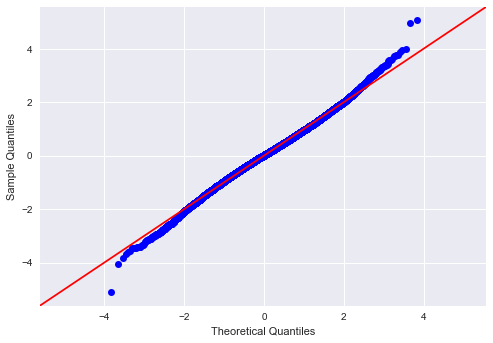

In [146]:
sm_check_resid_normality(res)

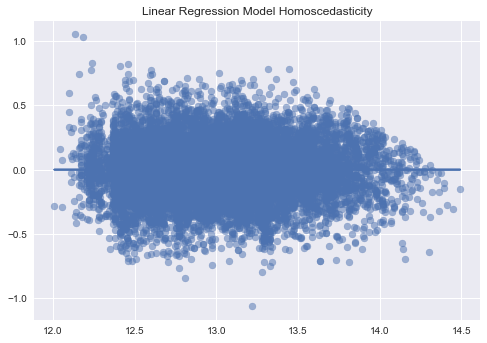

In [147]:
sm_check_scedas(res, df_train_y, X)

In [148]:
# generate predictions
ypred = res.predict(X)

z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

79641.25698561905

Some post-modeling notes (in comment form):

In [149]:
#### Sale TYPE may be interesting to look at as well. For instance, whether the 
# sale was completed via a corporate entity or an individual.
# One reason why this might be significant is that a corporate entity will 
# typically be looking to profit as much as possible from the deal and will
# have expertise. An individual might take a lower offer for various reasons:
# lack of expertise, incentive to sell the property quickly (i.e. already moved
# into a new house), or they could have even sold at discount to a family member.

In [150]:
# Note that there are also accessory buildings that might be located on a 
# property, which may boost value and squarefootage of buildings. For ex,
# there could be a barn on a property, which would boost value.

## Interpretation of Model

### Finding 1: R-squared value

Model 3 has an r-squared value of about 83.8%, which means that it is able to explain about 83.8% of the variance of the actual data points from the predicted values represented by the model.
Below is a visualization of the model versus the actual values.

In [151]:
# visualize the error in model 3
X = df_final.drop(['price'], axis=1)
y = df_final['price']
lin_model(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
y_hat = lr.predict(X_train)

plt.figure(figsize=(12, 8))

ax = sns.distplot(np.exp(y), color="b", label="Actual Prices", hist=False)
sns.distplot(np.exp(y_hat), label="Predicted Values" , color="r", ax=ax, 
             hist=False)

plt.ticklabel_format(style='plain', axis='x')
#plt.ticklabel_format(style='plain', axis='y')


plt.title('Actual vs Predicted Values for Home Prices')
plt.xlabel('Price')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()

NameError: name 'df_final' is not defined

As seen by this visualization and the r-squared value, the model is not perfect. However, it does at least offer a very good starting point for ruling out homes or further investigating homes to build or buy. It can also offer a way in which the stakeholder can understand whether a particular home may be under or overvalued.

#### Mean Absolute Error

Mean absolute error is the average amount of deviation between predicted house sale prices and actual house sale prices. The mean absolute error for this model is $68,900.85, which means that the model is expected to overestimate or underestimate what a particular home will sell for in King County by this amount.

### Finding 2: Most significant model coefficients

In [ ]:
# create df with coefficient names and values

# re-establish linear regression model to extract relevant info
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
lr.fit(X_train, y_train)

# define names and values of the coefficients
co_names = X_train.columns   # X_train columns - labels with log-transform
co_values = lr.coef_

# create df with these variables
df_coefs = pd.DataFrame(list(zip(co_names, co_values)), 
                        columns=['Coefficients', 'Values'])

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.7f' % x)

# change values in 'Values' to absolute - we care about the magnitude
df_coefs['Values'] = df_coefs['Values'].abs() 

df_coefs.sort_values(by='Values', ascending=False)     # highest values at top

The most significant coefficients are lat, waterfront, and sqft_above. 
Further investigation of why these coefficients are the most significant is offered below.

#####  Latitude

In [ ]:
# ceate QQ-plot of lat to investigate linearity
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(df2['lat'], dist=stats.norm, line='45', fit=True)

Latitude is roughly linear and when plotted against price, it has a somewhat trimodal distribution with the first bell curve seeming about half the size as the other two (as seen in 4.1). 
Interpretation of lat characteristics:
* Rough linearity facilitates greater significance in linear regression.
* The trimodality of latitude versus price is insignificant, but latitude trends upward as price does (seen in 4.2), which facilitates greater significance in linear regression.

##### Waterfront

* Look at the values found in waterfront and their frequency.
* Look at scatterplot of waterfront vs. price.

In [ ]:
df['waterfront'].value_counts()

Most properties are not waterfront properties or they did not have an entry included. Only 146 homes are waterfront properties.

In [ ]:
plt.scatter(df['waterfront'], df['price'] / 100_000, alpha=0.2)

Observations:
* Almost all homes are concentrated in lower value ranges and do not have waterfronts.
* It seems that the model is deriving weight from the waterfront variable by ascribing significance in the frequency of homes with a waterfront. For instance it is safe to say that homes without a waterfront will have a low price (in general), and homes with a waterfront will typically trend higher in price.

##### sqft_above

The third highest linear relationship among the coefficients with price is sqft_above. This relationship is intuitive because one would expect that as the square footage of a home increases, then the price would increase proportionally. Additionally, sqft_above is log-normal and has a fairly linear relationship with price. This relationship will be shown again below.

In [ ]:
plt.scatter(df['sqft_above'], df['price'] / 100_000, alpha=0.1)